# Conociendo nuestros datos de pingüinos 🐧

## El problema a resolver


* Realizar un Analisis Exploratorio de la base de datos penguins

    * Determinar el tipo de pinguino (Adelie, Gentoo o Chinstrap) con base en sus caracteristicas.
    * Determinar el peso con base en otras caraxterísticas

## Instalar librerías necesarias

### En Colab
```
!pip install --upgrade pip
```
```
!pip install numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [4]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [5]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff660977',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

Conjunto de datos previamente procesados.

In [6]:
preprocessed_penguins_df = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/penguins.csv')

## Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:

(
    preprocessed_penguins_df
    .dtypes
    .value_counts()

)

float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocessed_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [10]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [11]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

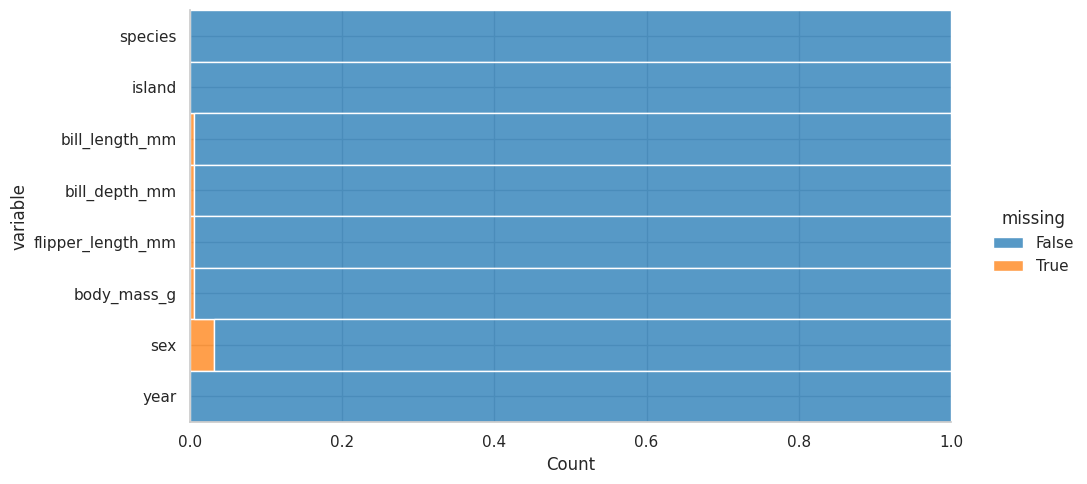

In [13]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

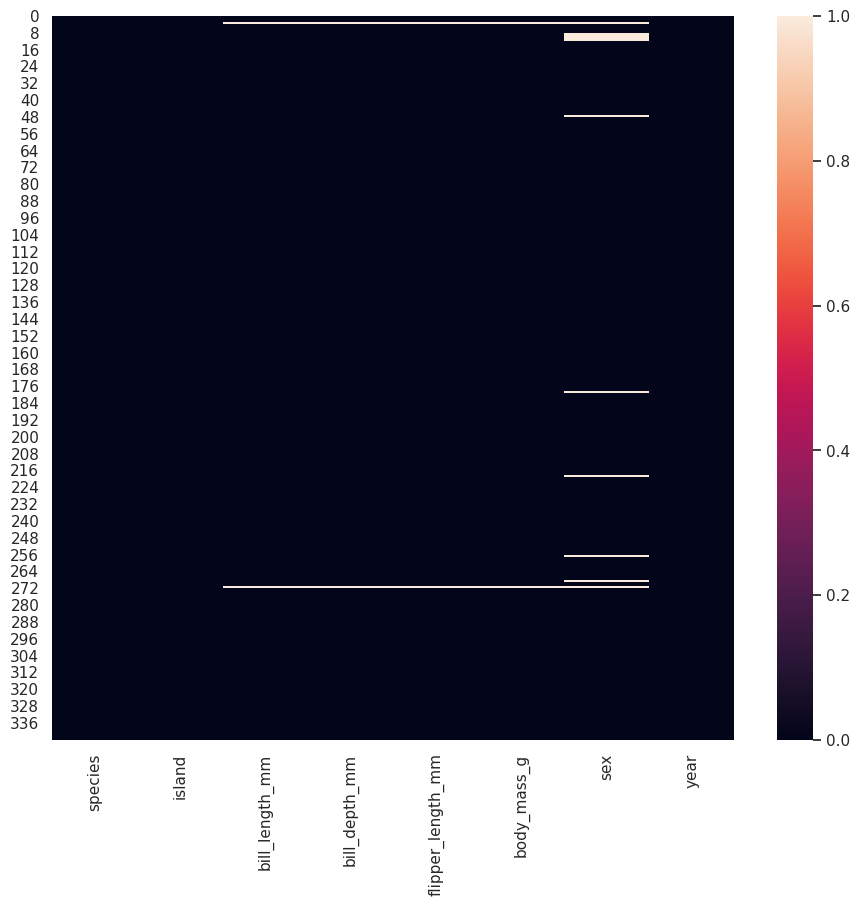

In [14]:
(
    preprocessed_penguins_df
    .isnull()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

<Axes: >

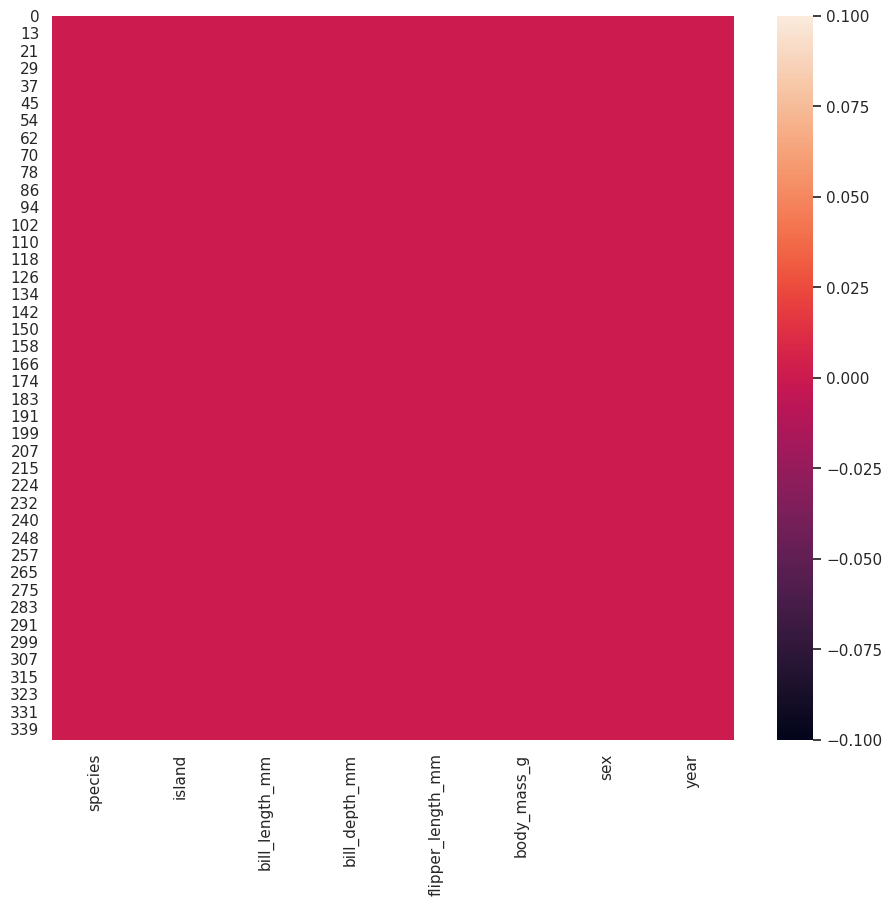

In [15]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

(processed_penguins_df.isnull()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

# Conteos (tabulación de valores) y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [16]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [17]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [18]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [19]:
(
    processed_penguins_df
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include=['category', object])
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<Axes: xlabel='species'>

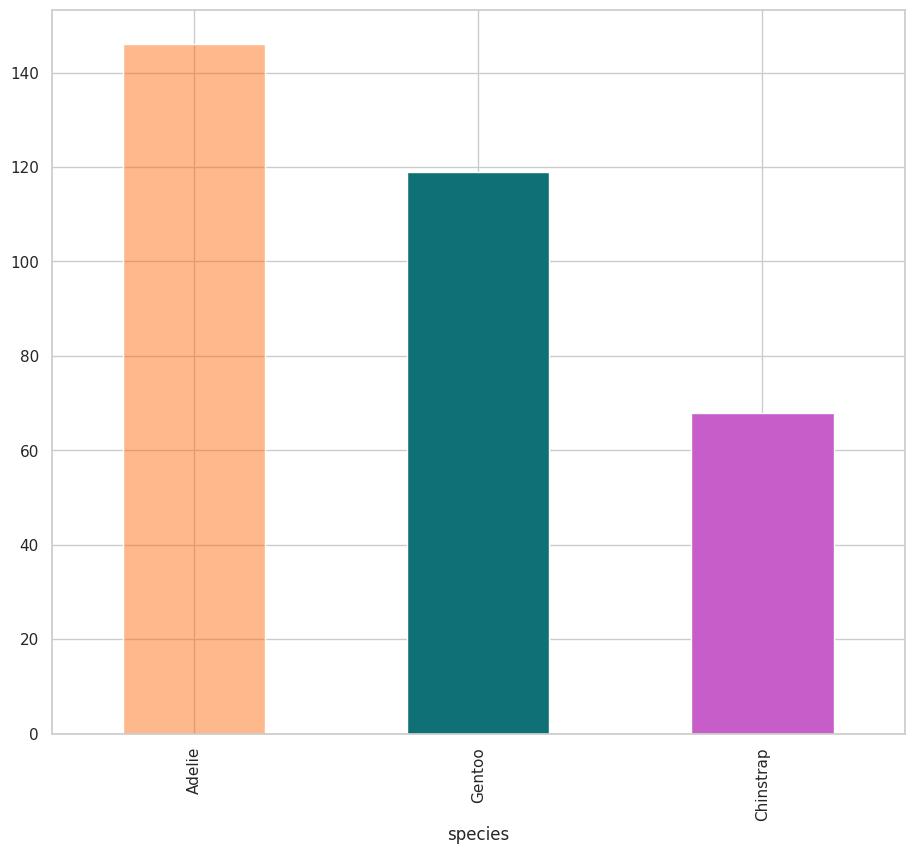

In [20]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        color=penguin_color.values()
    )
)

### Seaborn

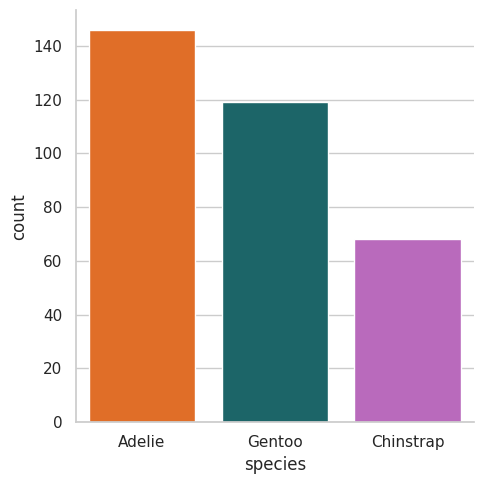

In [21]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    hue='species',
    #order=processed_penguins_df.value_counts('species', sort=True).index
)

<Axes: xlabel='species', ylabel='count'>

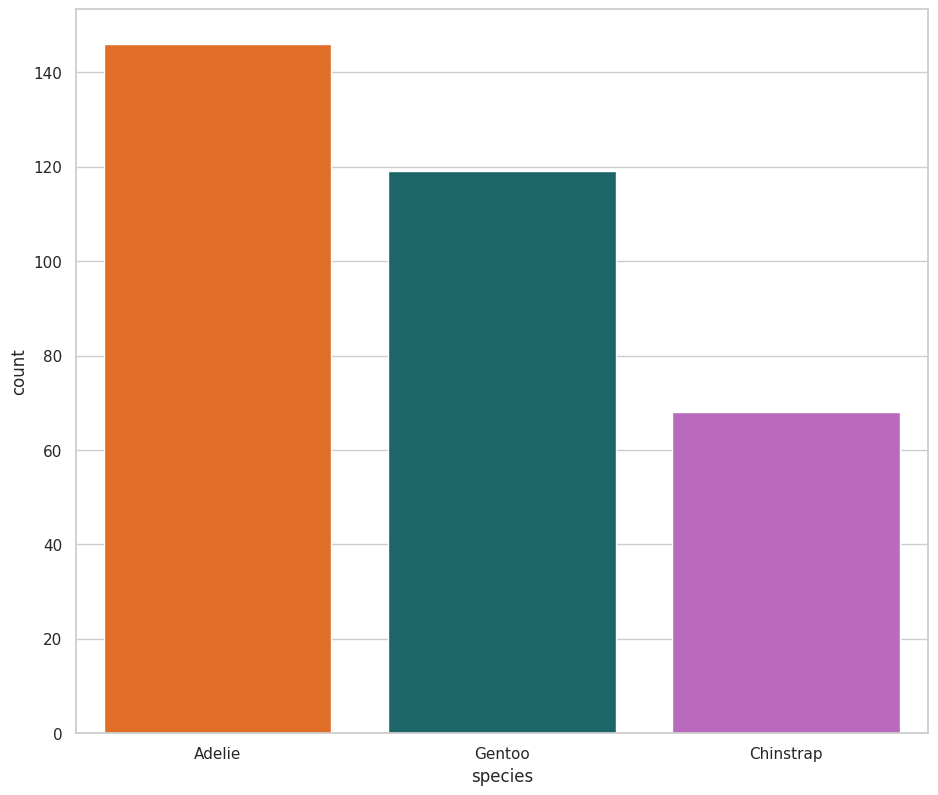

In [22]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color,
                hue='species',
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

/tmp/ipykernel_71869/3559442056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_penguins_df['variable']=''


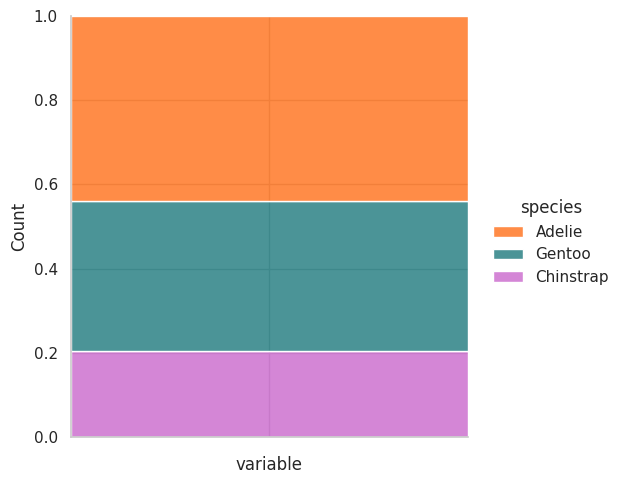

In [23]:

processed_penguins_df['variable']=''

processed_penguins_df.pipe(
        lambda df: (
             sns.displot(
                data=df,
                x='variable',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )


* Ejercicio explorar las otras variables categoricas en el dataset

# Medidas de tendencia central

## Media o promedio

In [24]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [25]:
np.mean(processed_penguins_df.bill_depth_mm) # utilizando numpy

17.164864864864867

In [26]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [27]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [28]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year variable  
0       3800.0  male  2009

In [29]:
processed_penguins_df.describe(include=object) # Variables categoricas

species  island   sex variable
count      333     333   333      333
unique       3       3     2        1
top     Adelie  Biscoe  male         
freq       146     163   168      333

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [30]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [31]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [32]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [33]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [34]:
processed_penguins_df.quantile(q=0.25,numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [35]:
processed_penguins_df.quantile(q=0.75,numeric_only=True) - processed_penguins_df.quantile(q=0.25,numeric_only=True) #50% de los datos alrededor de la media

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [36]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('Variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

Variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

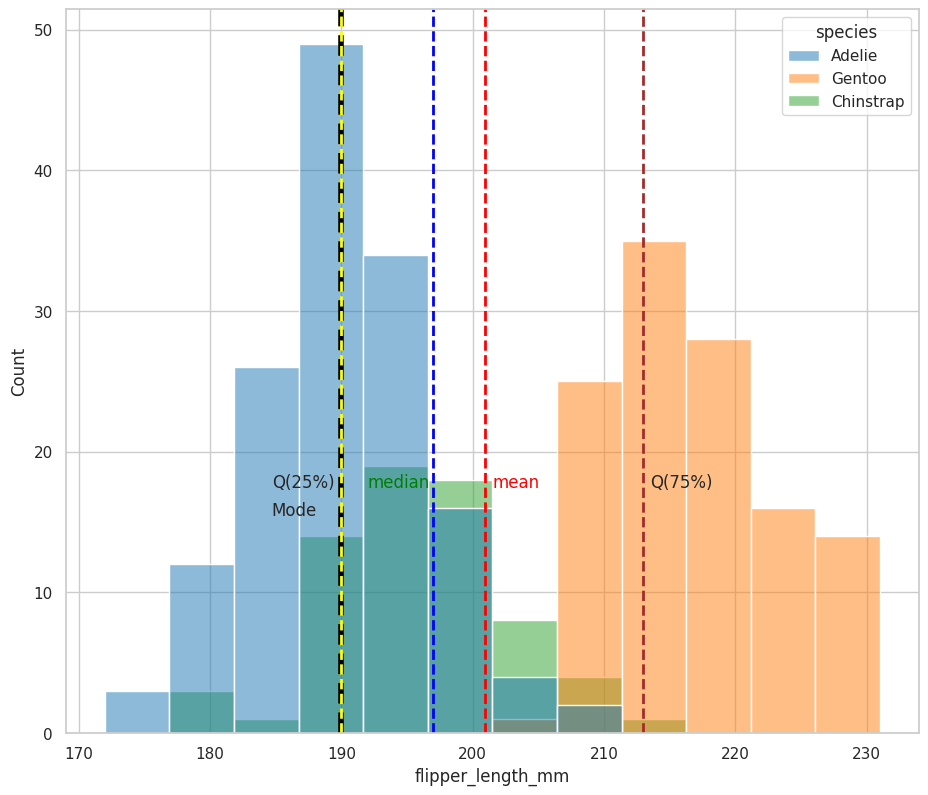

In [37]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    
    binwidth=5,
    hue='species',
    alpha=.5,
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='brown',
    linestyle='dashed',
    linewidth=2
)
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(184.7,15.5, 'Mode', fontsize=12)
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

## Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

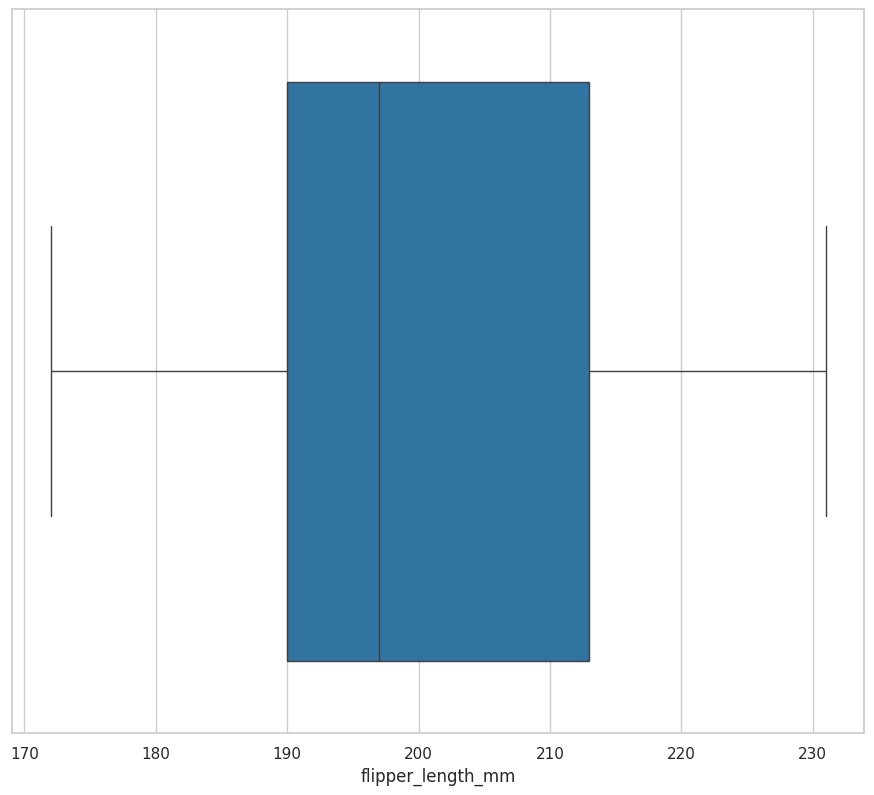

In [38]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

/tmp/ipykernel_71869/1005071218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='flipper_length_mm', ylabel='species'>

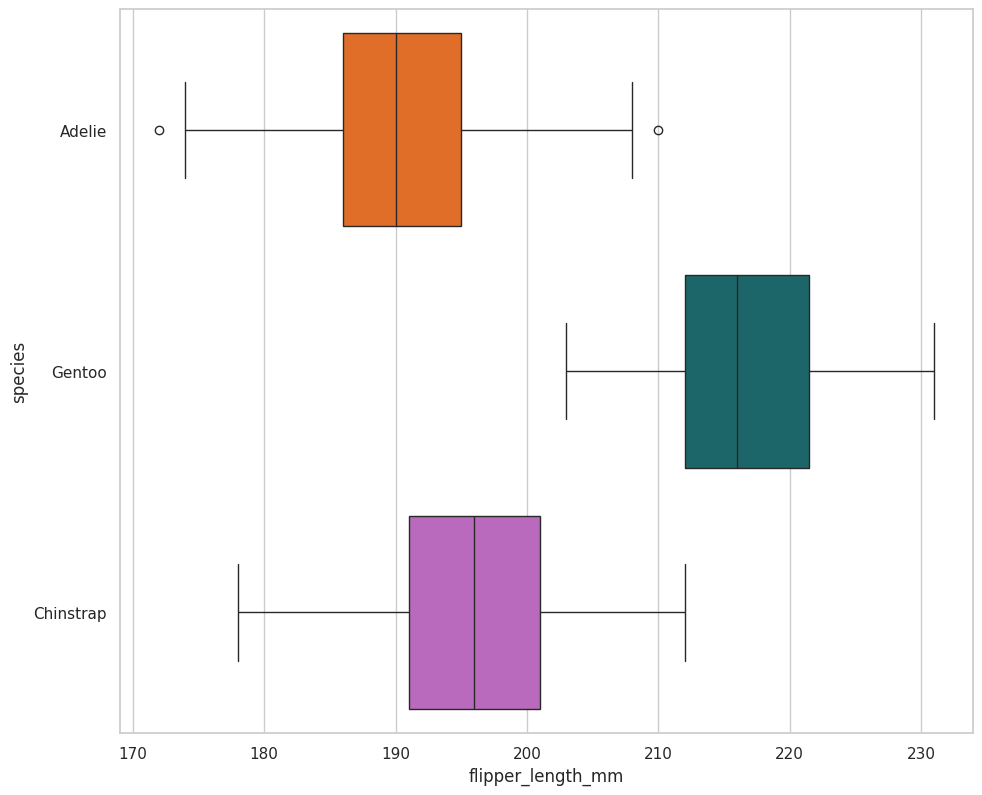

In [39]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

## Limitaciones

In [40]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

nbins= freedman_diaconis_bindwidth(processed_penguins_df.flipper_length_mm)

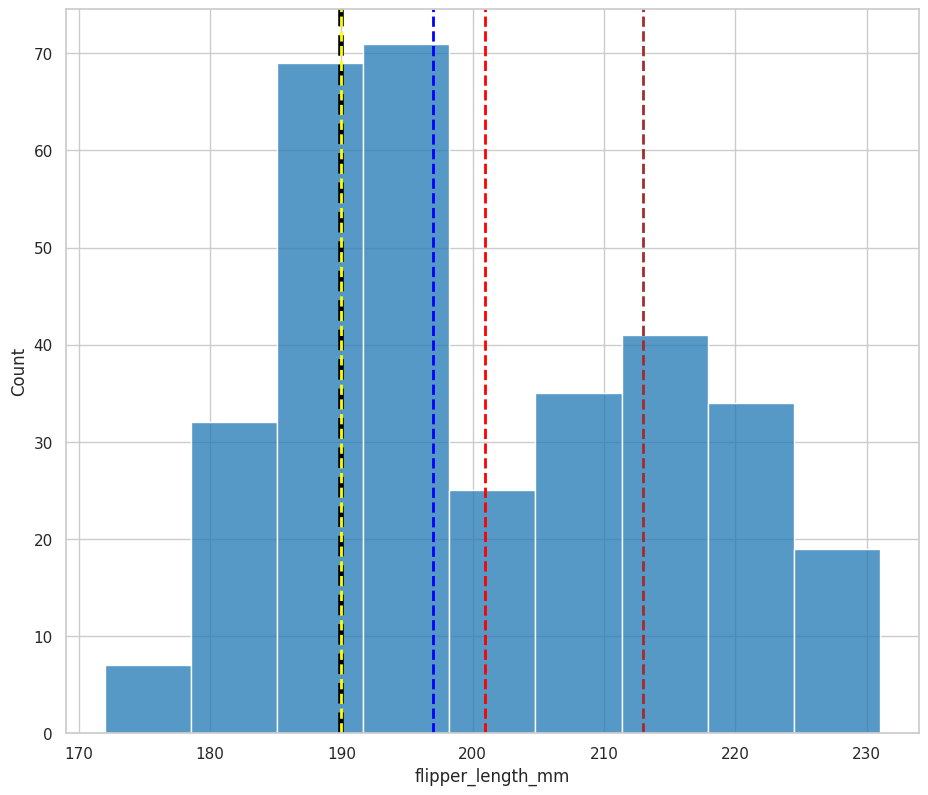

In [41]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth= nbins)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='brown',
    linestyle='dashed',
    linewidth=2
)

<Axes: xlabel='flipper_length_mm', ylabel='species'>

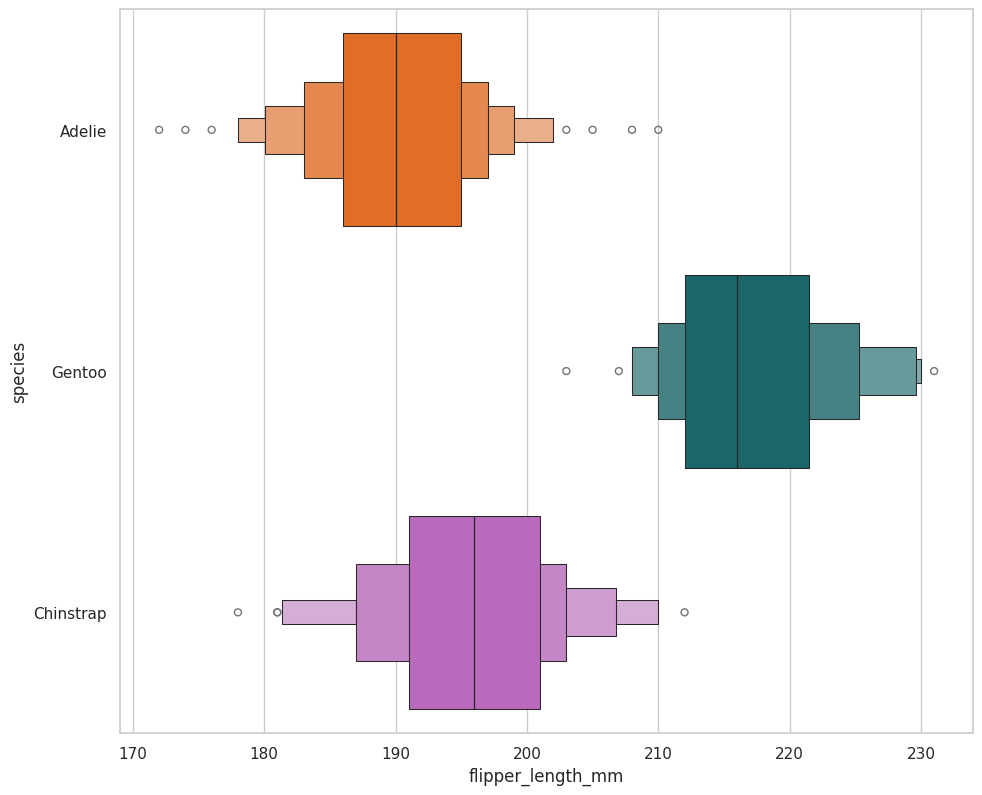

In [42]:
sns.boxenplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    y="species",
    palette=penguin_color,
    k_depth=4,
    hue='species',
)

Las gráficas boxenplot nos ayudan a identificar un poco mejor la distribución de nuestros datos sin necesidad de hacer un histplot. Es tan versatil que podemos ajustar la cantidad de quantiles que queremos relfejar. Aunque es más útil cuando hay mayor cantidad de datos puede influir en una mejor interpretación:

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

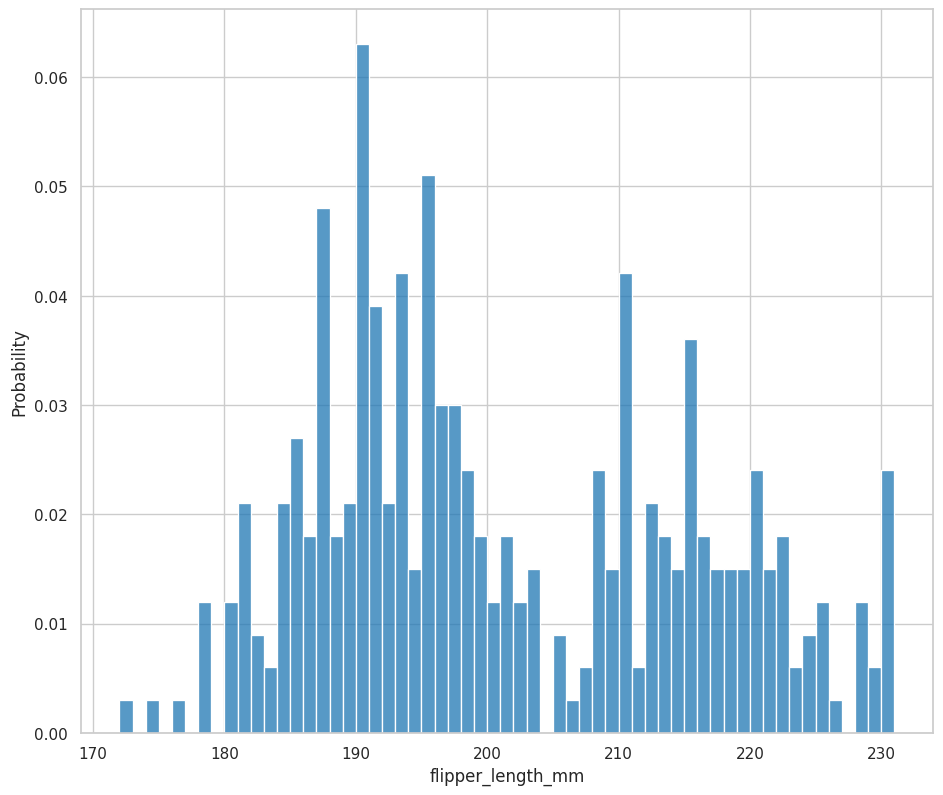

In [43]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando empiricaldist

In [44]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

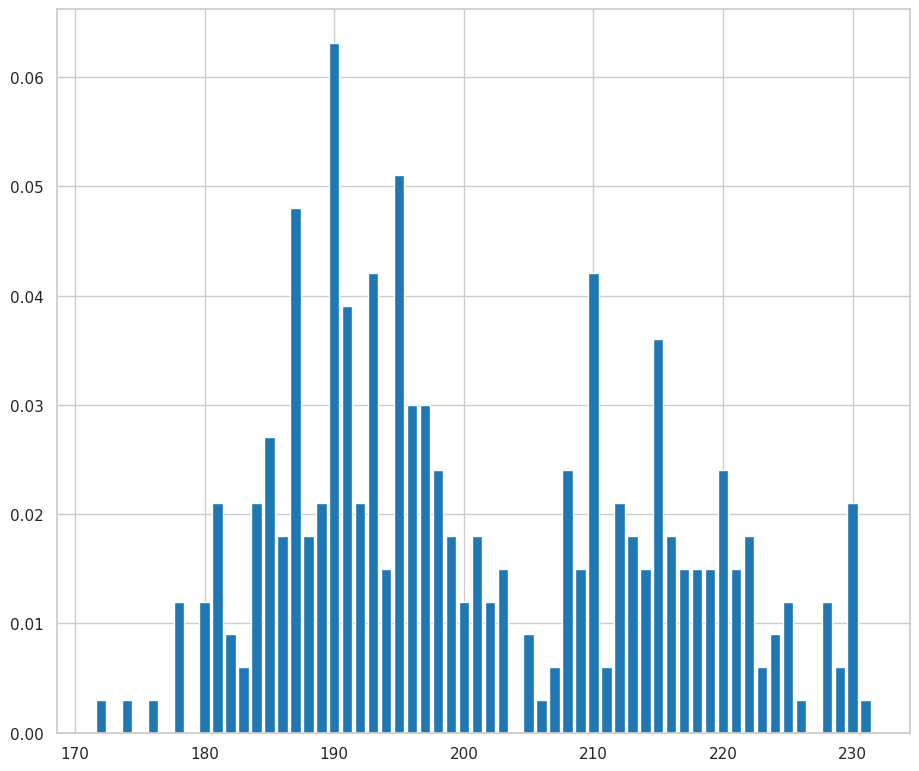

In [45]:
pmf_flipper_length_mm.bar()

In [46]:
pmf_flipper_length_mm(231)

0.003003003003003003

In [47]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

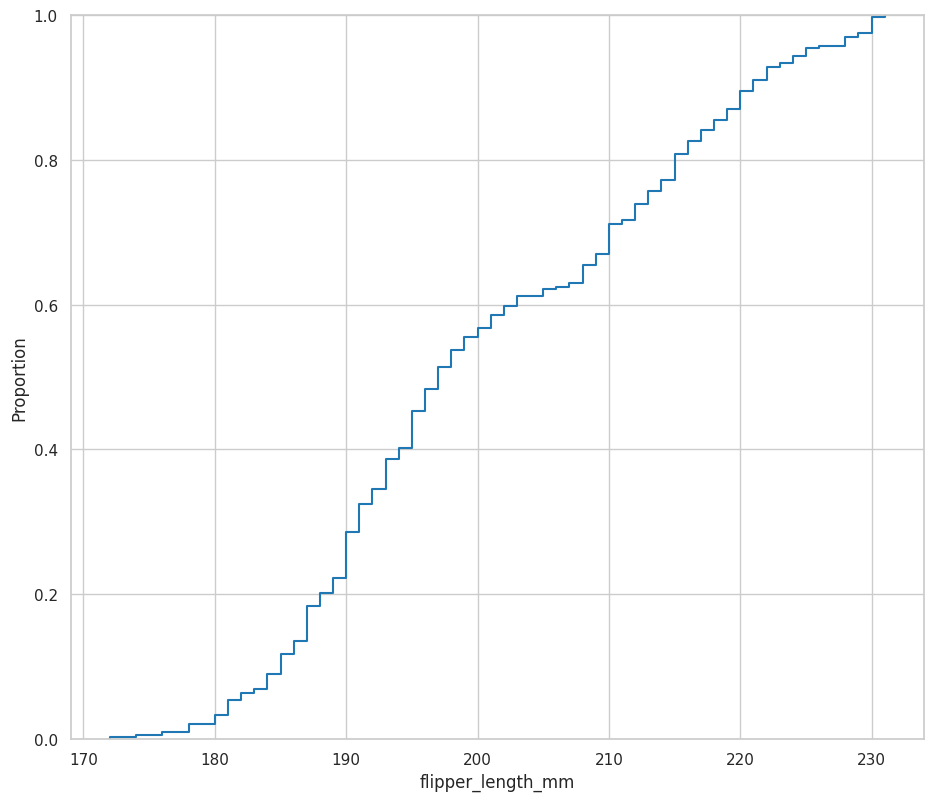

In [48]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

### Utilizando empiricaldist

In [49]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

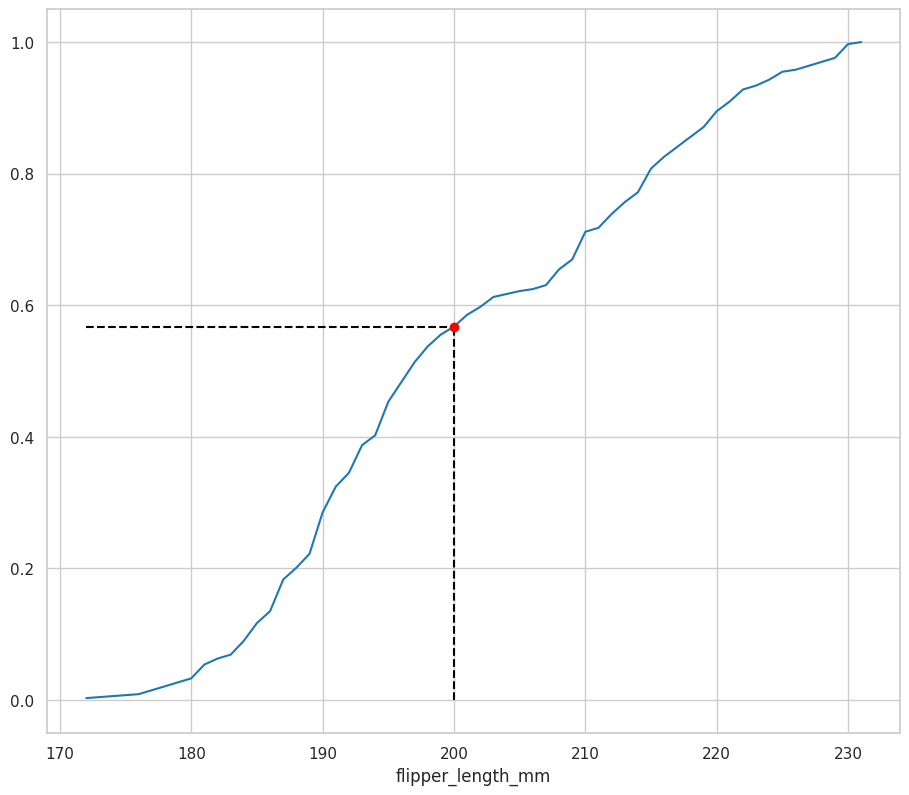

In [50]:
cdf_flipper_length_mm.plot()

q = 200 # Specify quantity
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

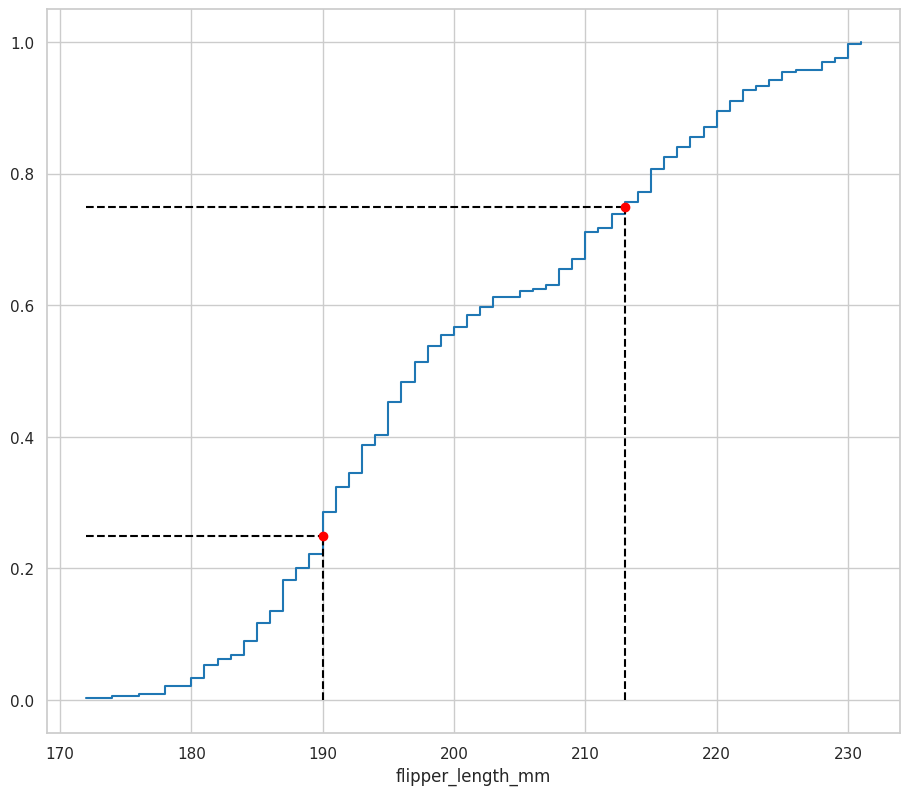

In [51]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

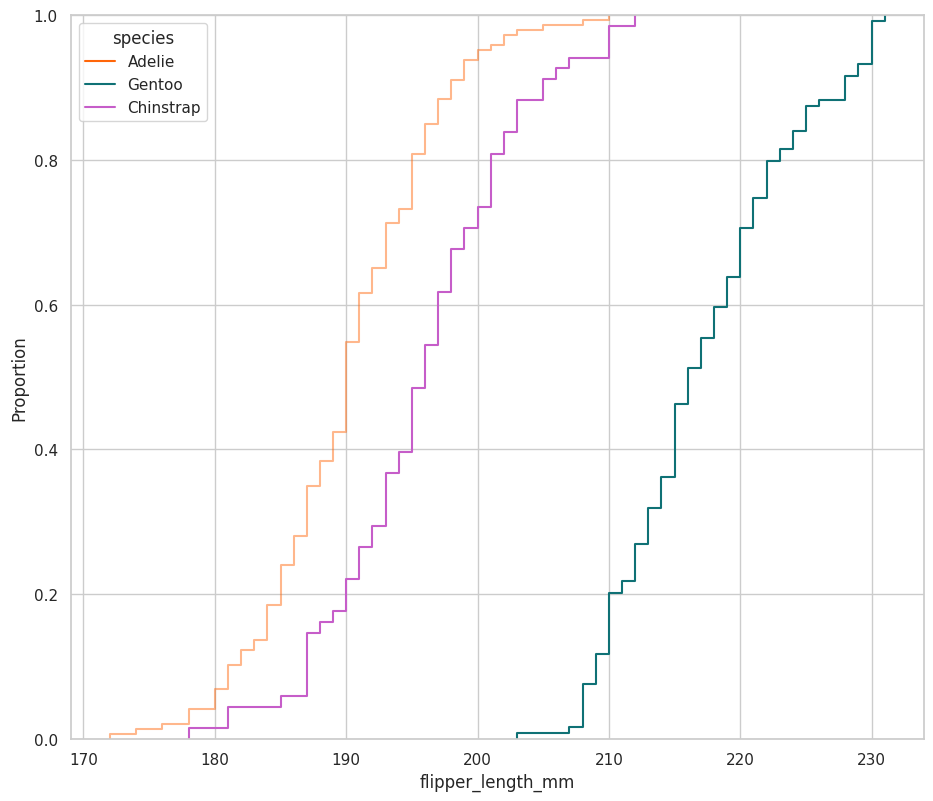

In [52]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

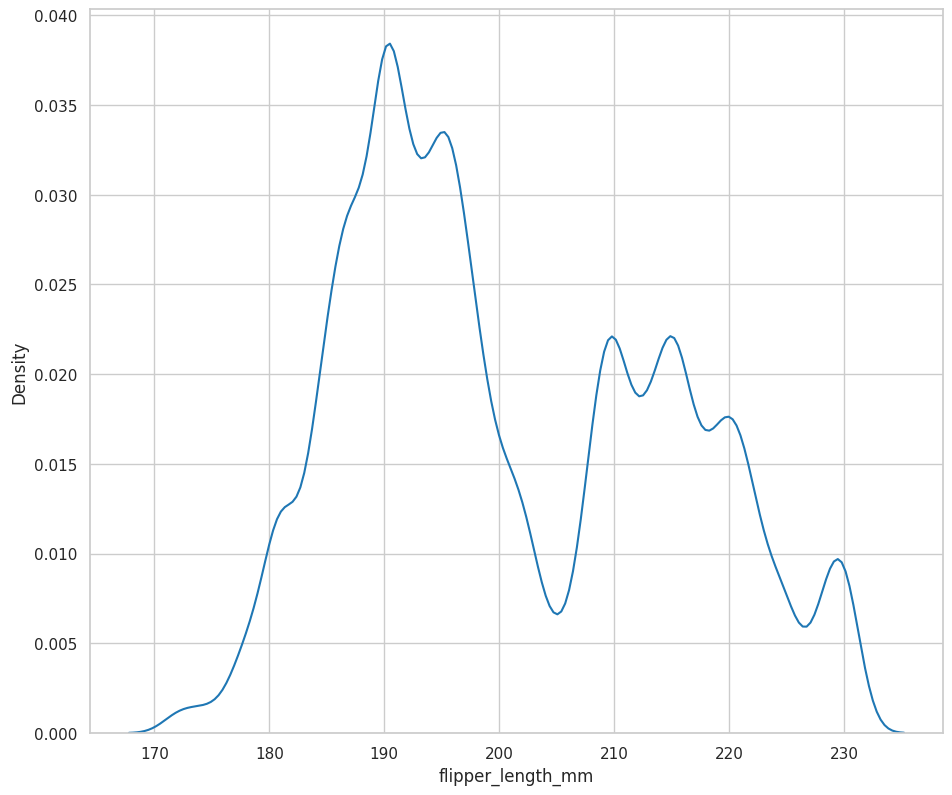

In [53]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [54]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

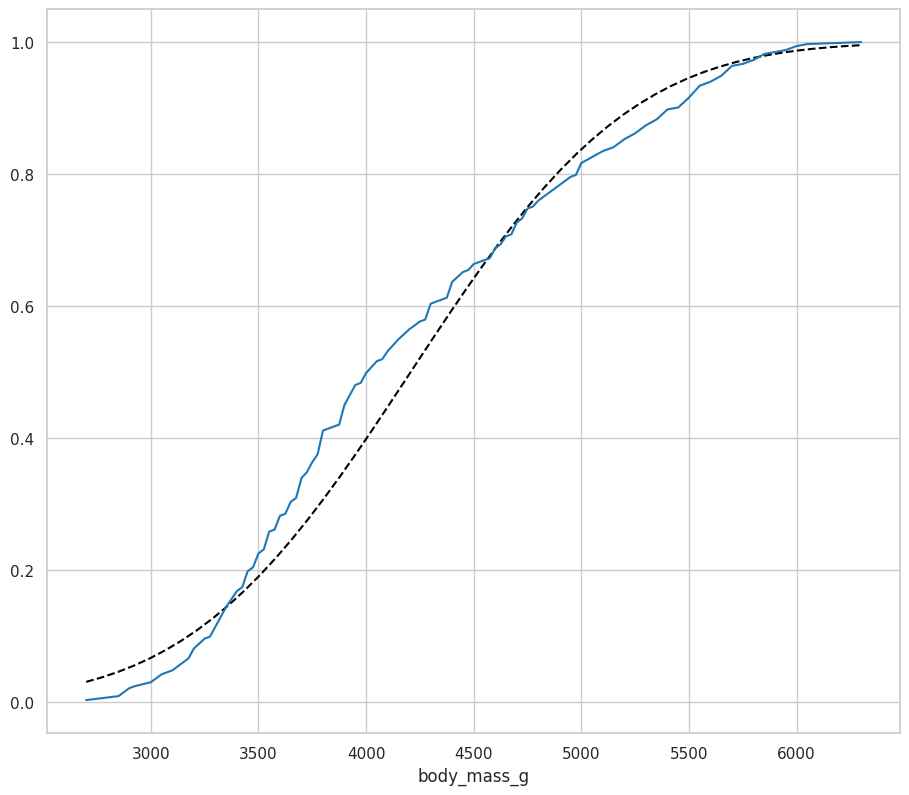

In [55]:
np.random.seed(42)
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

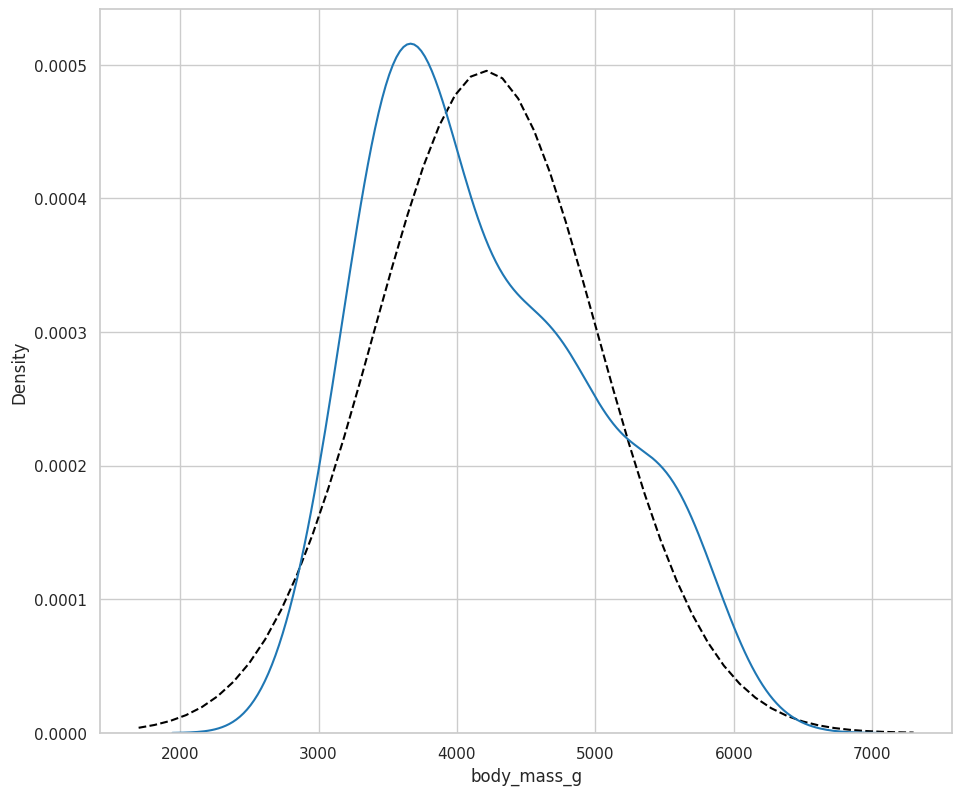

In [56]:
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

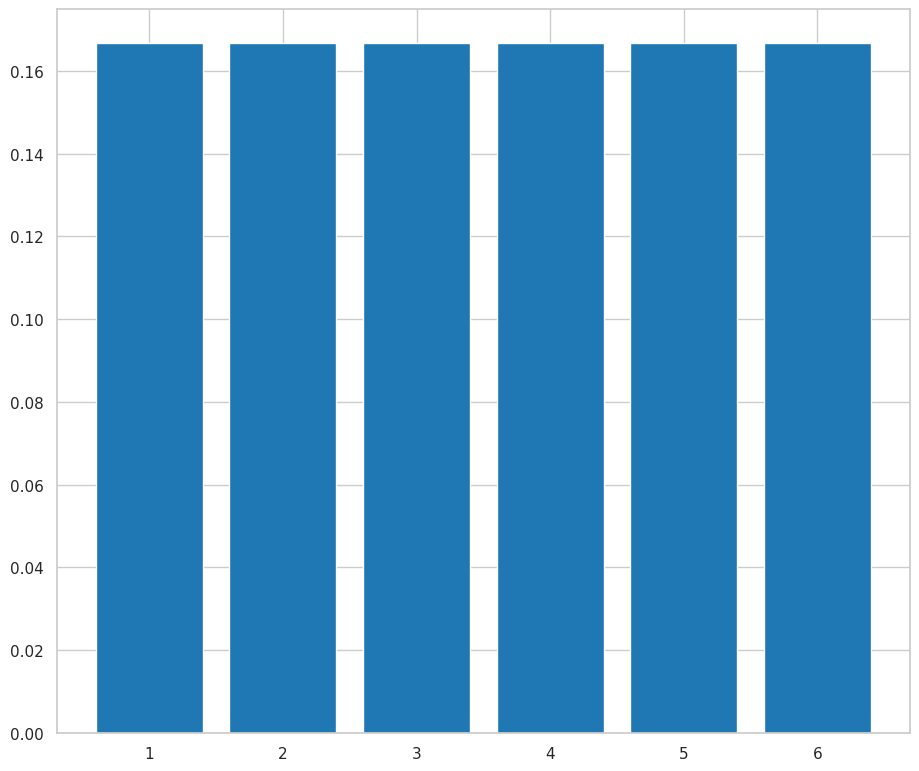

In [57]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

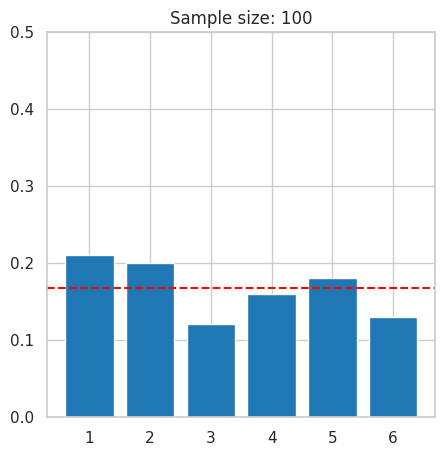

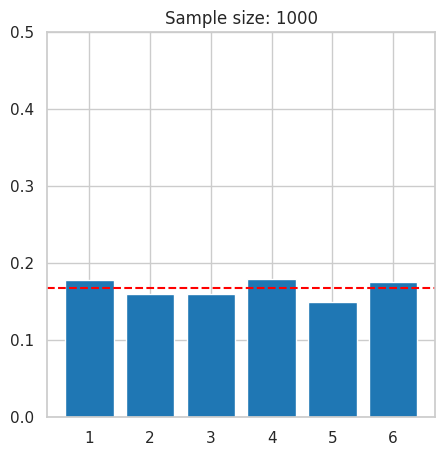

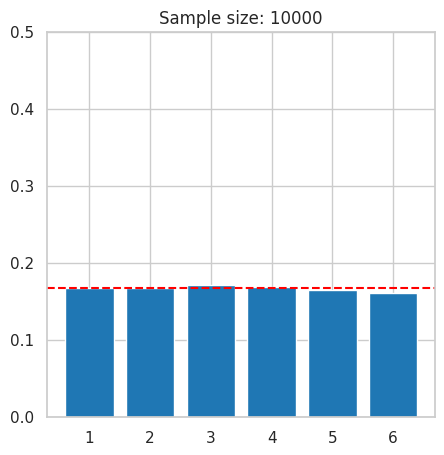

In [58]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")


In [59]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

# Estableciendo relaciones: Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

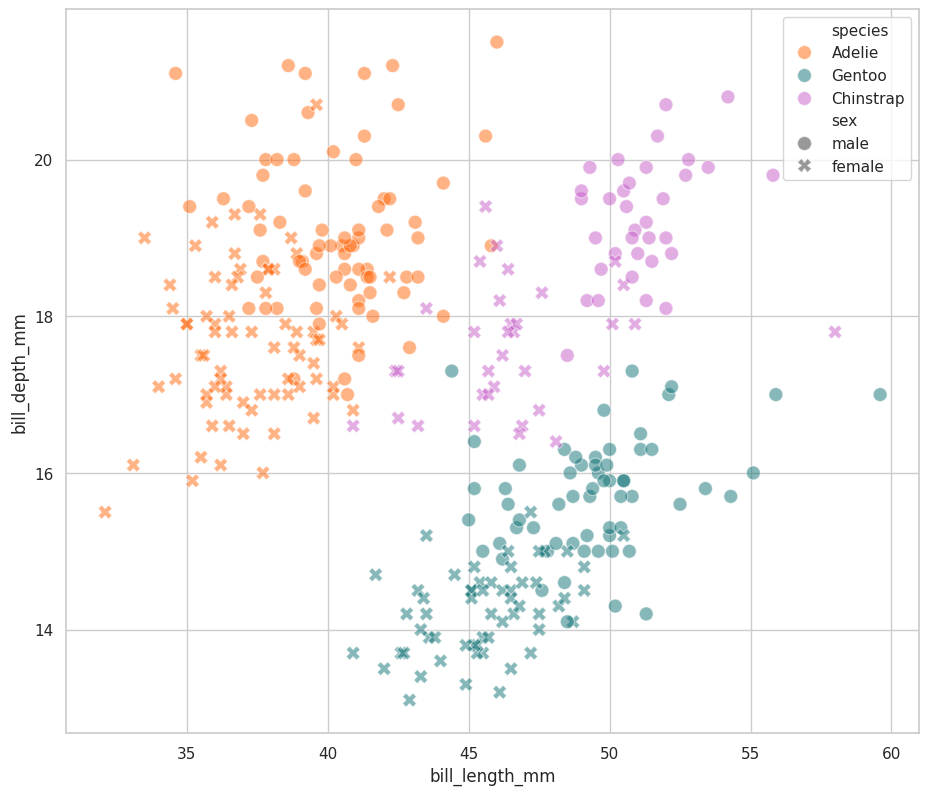

In [60]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100,

    style='sex',
    palette=penguin_color,
    hue='species'
)

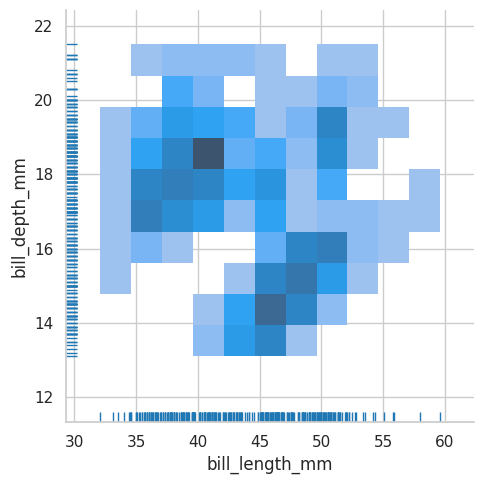

In [61]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

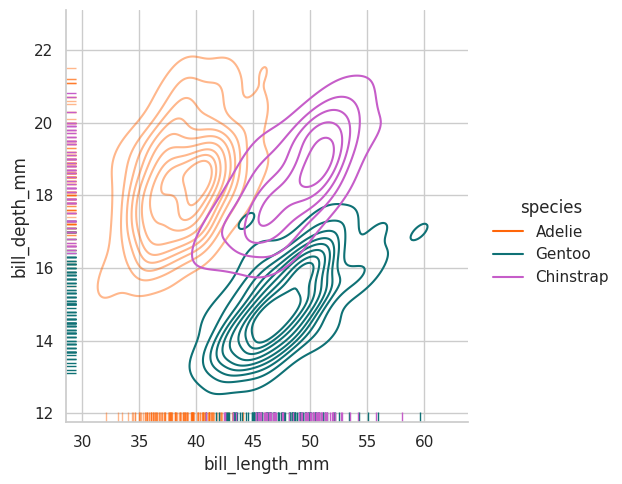

In [62]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True,

    palette=penguin_color,
    hue='species'
)

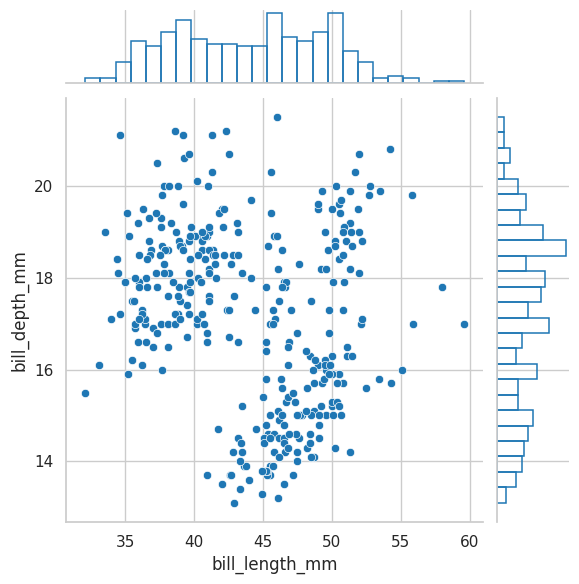

In [63]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    marginal_kws=dict(bins=25, fill=False)
)

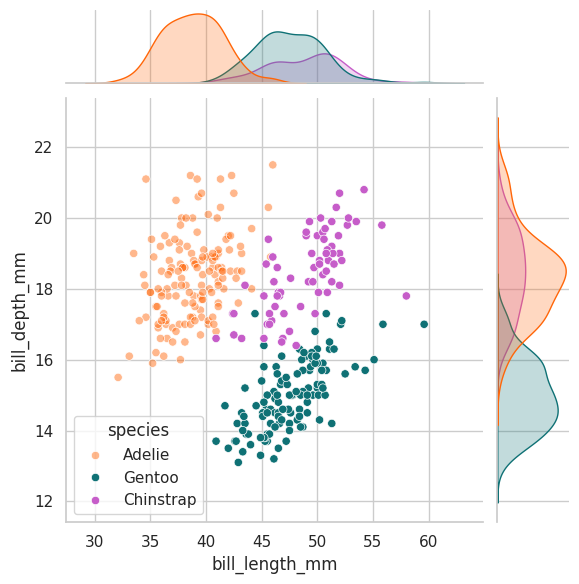

In [64]:
sns.jointplot(
    data=processed_penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm', 
    palette=penguin_color, 
    hue='species'
      )

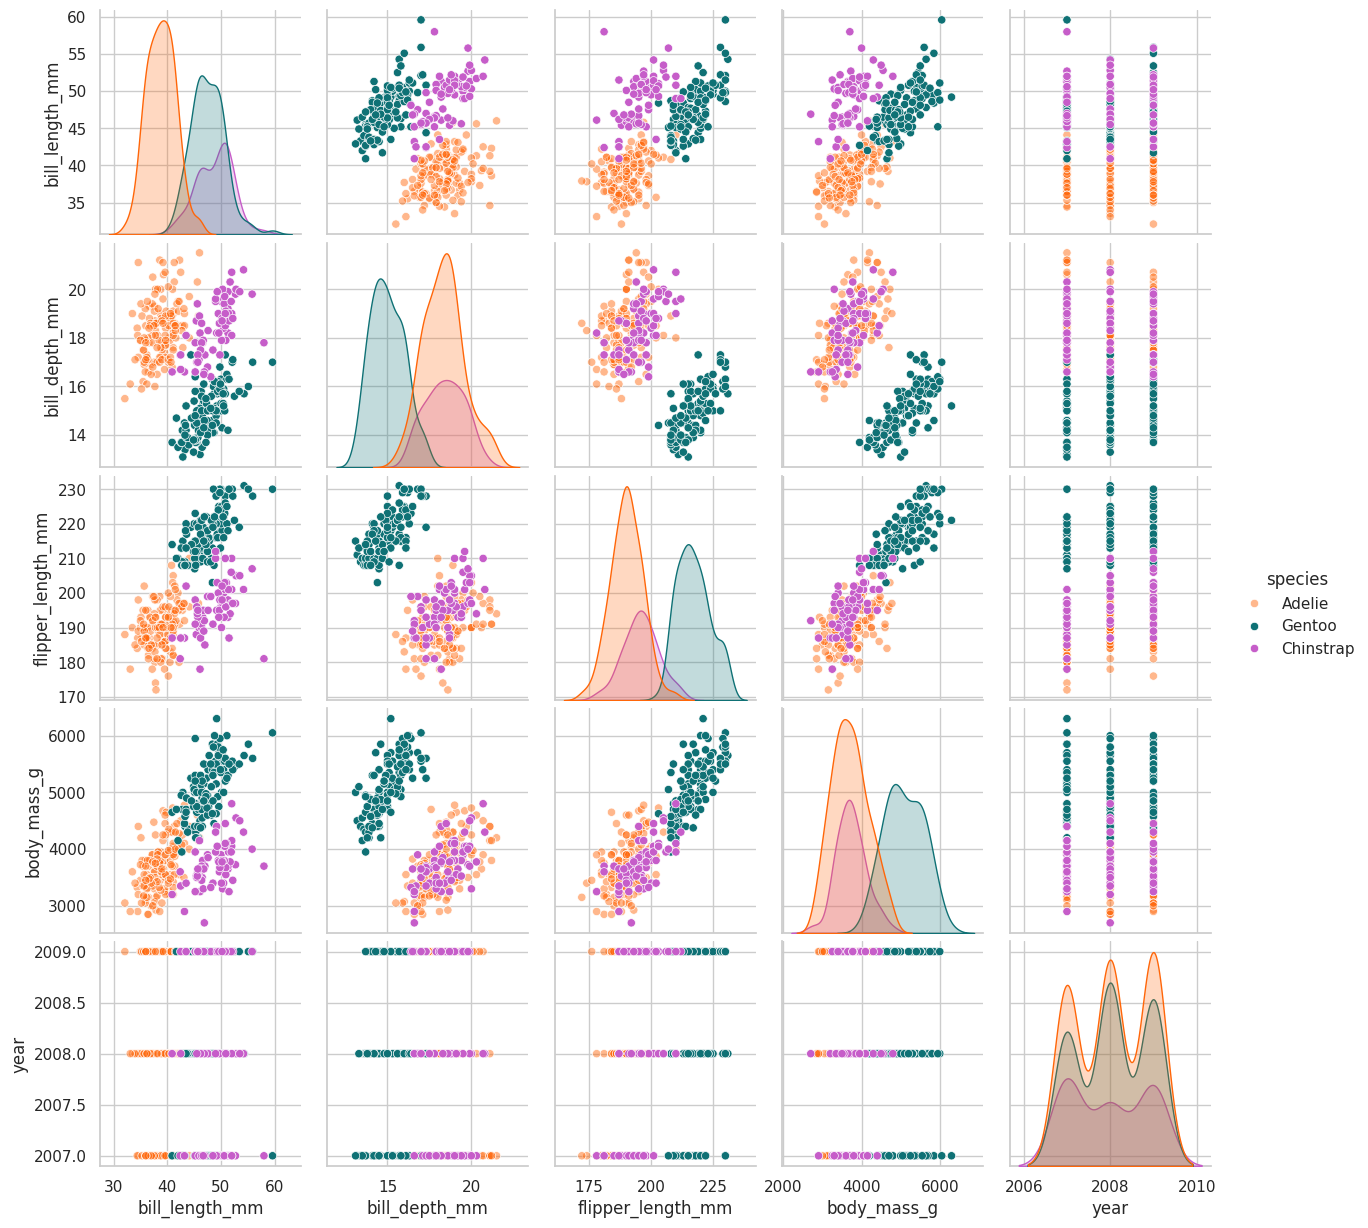

In [65]:
sns.pairplot(
    data=processed_penguins_df, 
    hue='species', 
    palette=penguin_color
    )

# Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

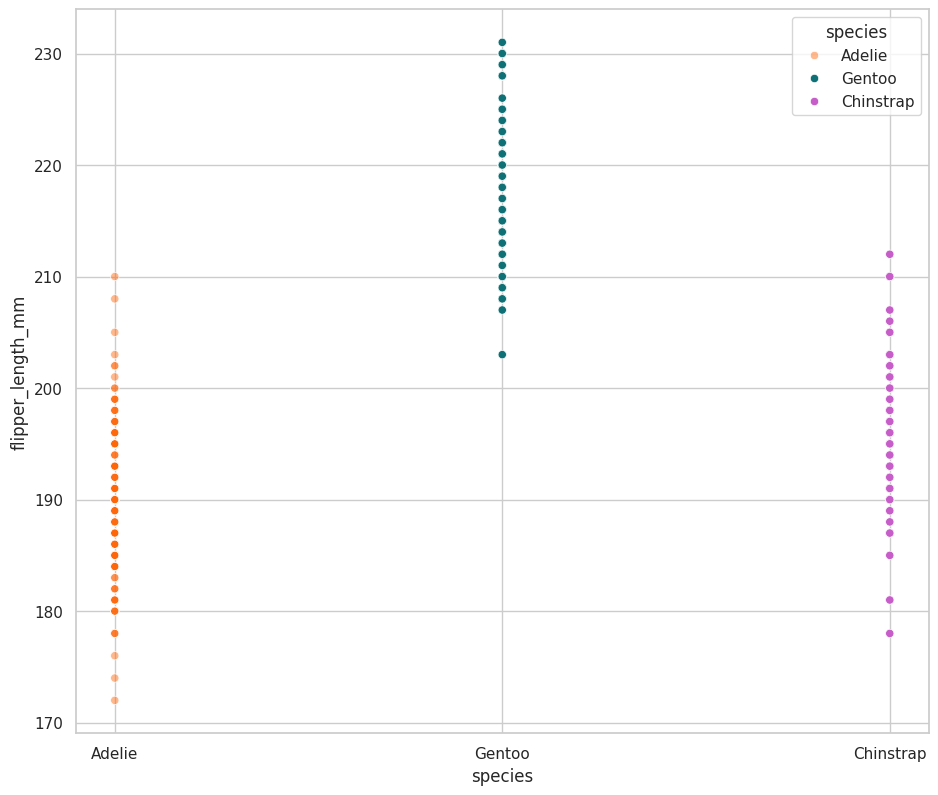

In [66]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

/tmp/ipykernel_71869/3747118776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


<Axes: xlabel='species', ylabel='flipper_length_mm'>

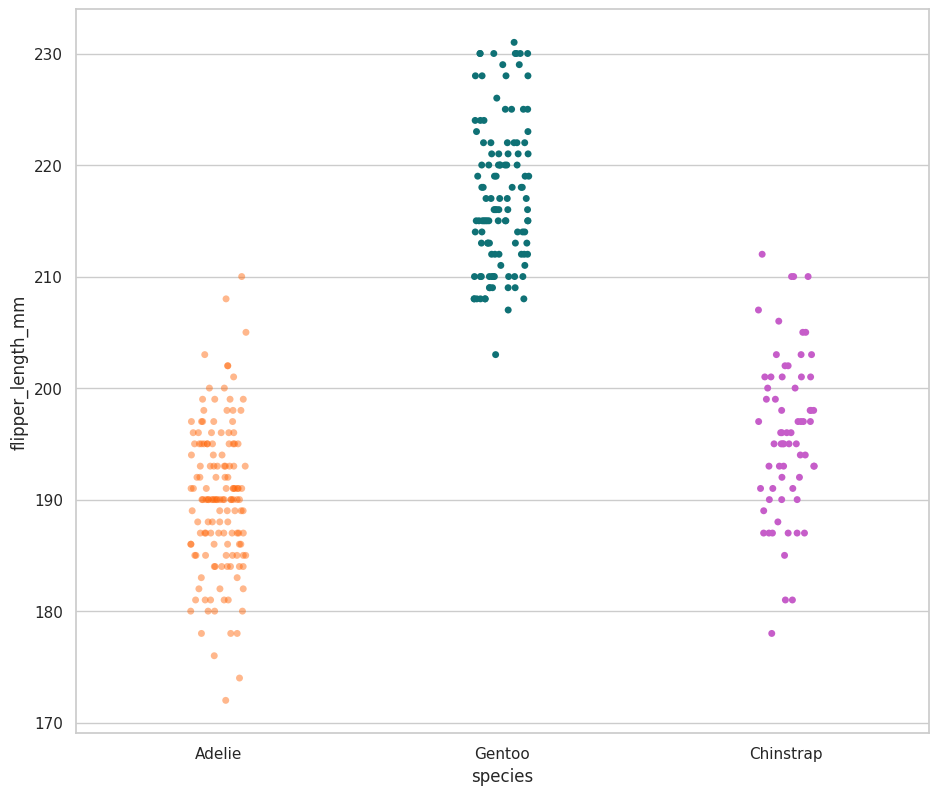

In [67]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color,
    
)

/tmp/ipykernel_71869/530499577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


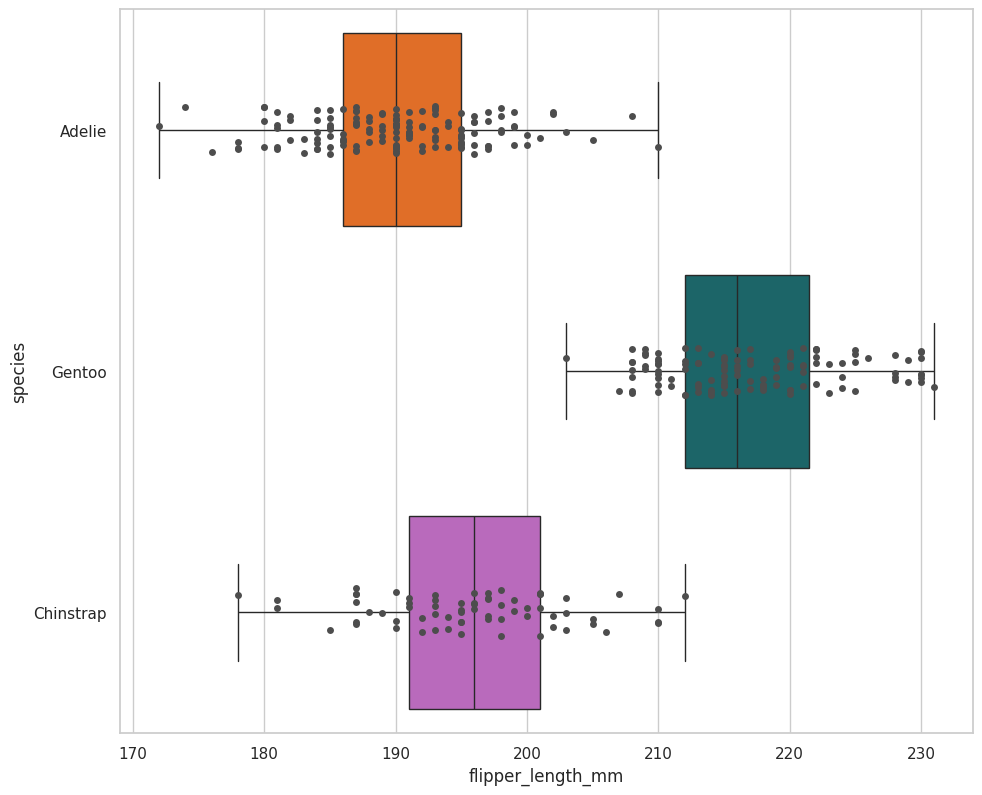

In [68]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

/tmp/ipykernel_71869/1926847696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


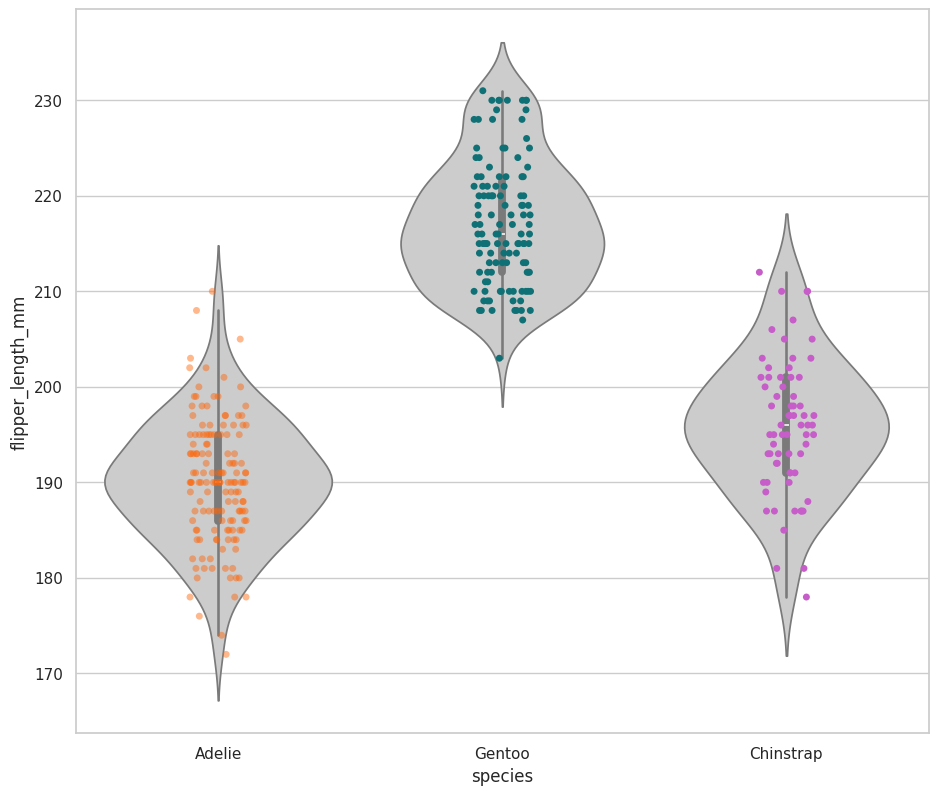

In [69]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

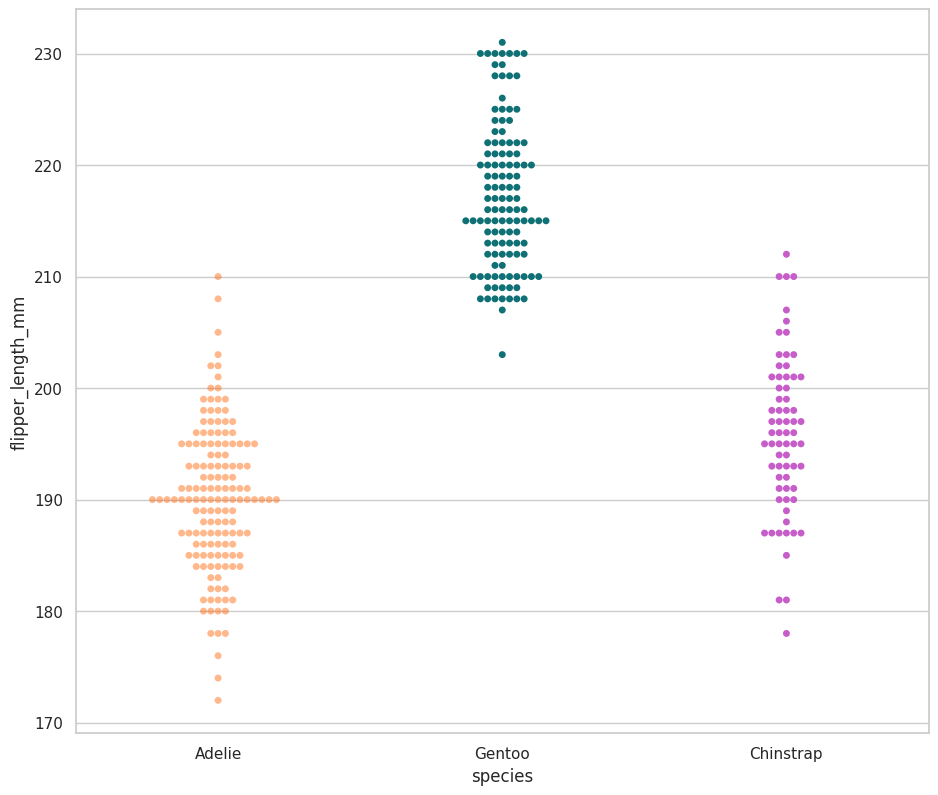

In [70]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [71]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Como puedo visualizar los coeficientes de correlación?

<Axes: >

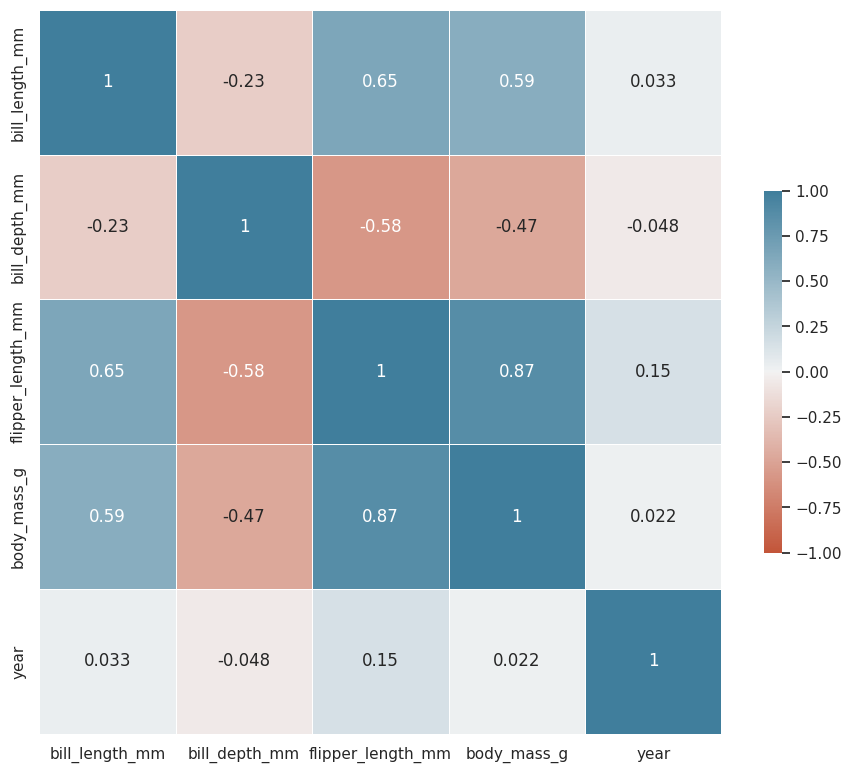

In [72]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

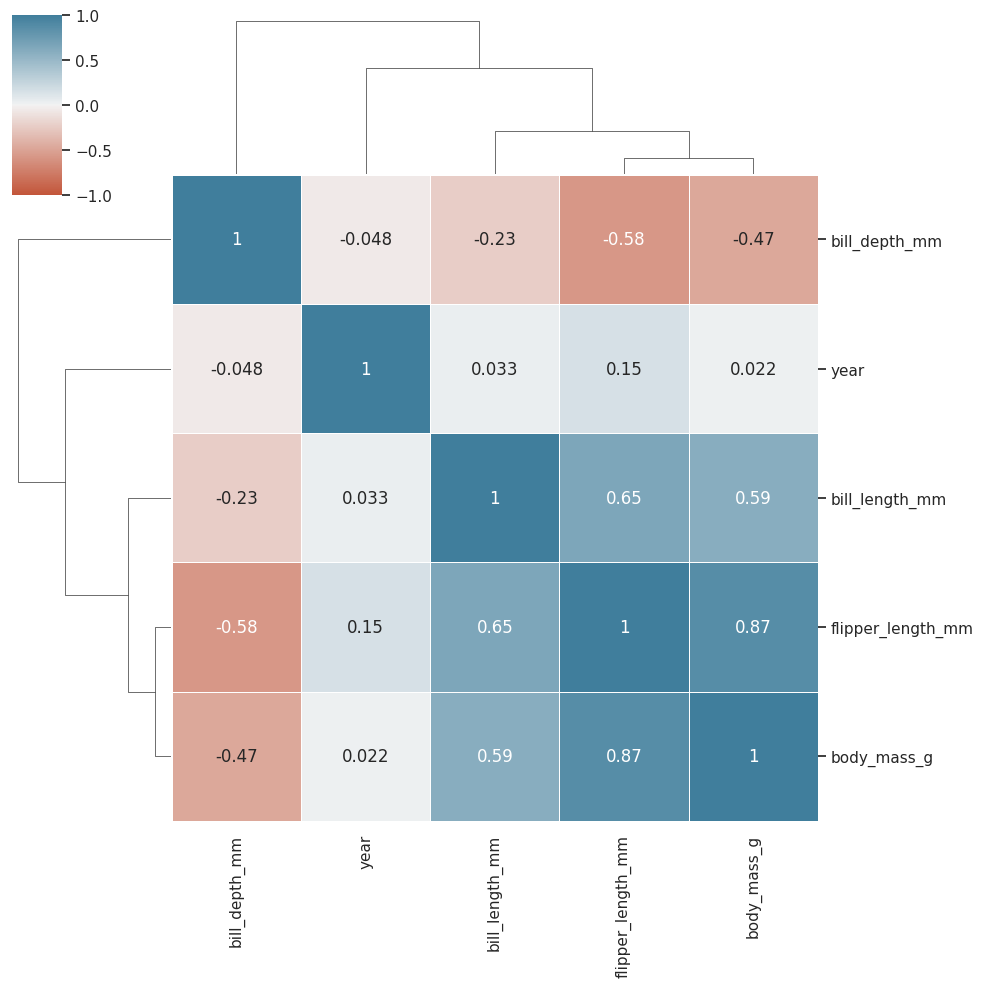

In [73]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¿Cómo podría representar una variable categórica como numérica discreta?

In [74]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['Female', 'Male'], [0, 1])

    )
)

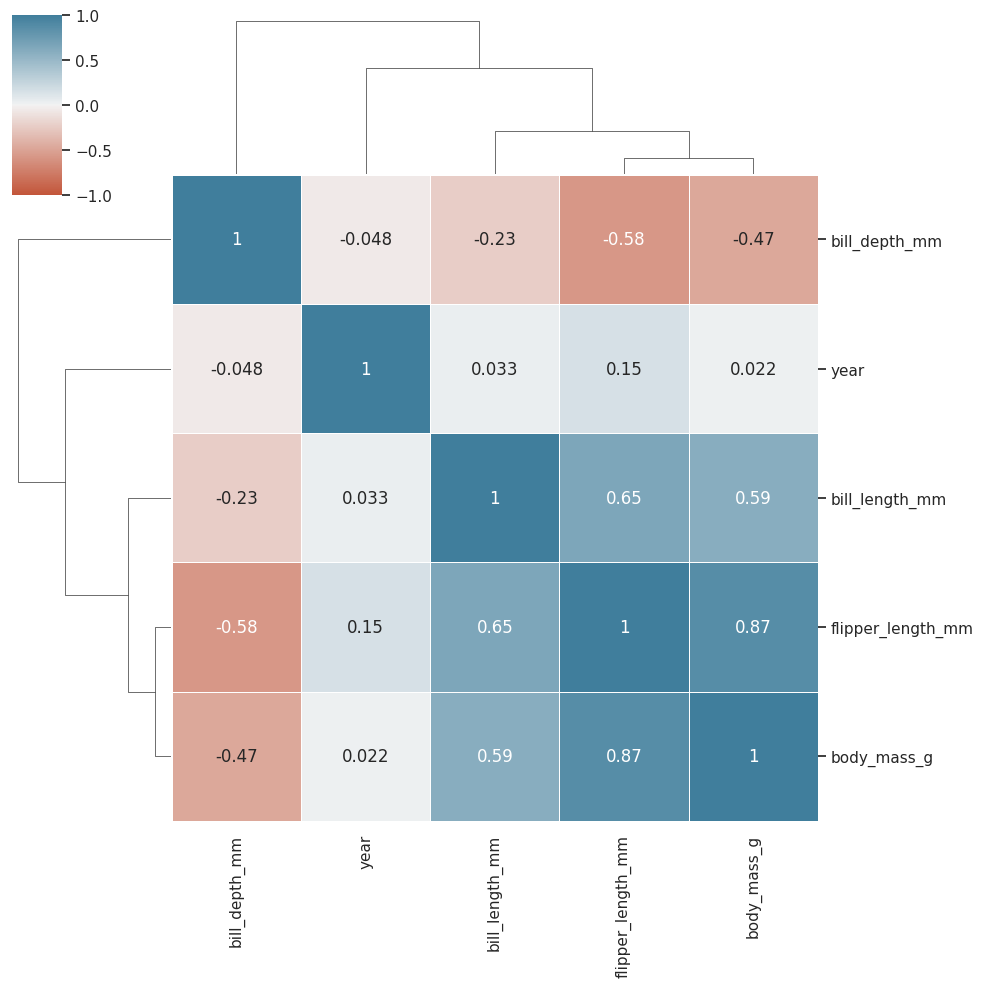

In [75]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¿Cuál es una límitante de los coeficientes de correlación lineal?

### Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[ 1.        , -0.02659852],
       [-0.02659852,  1.        ]])

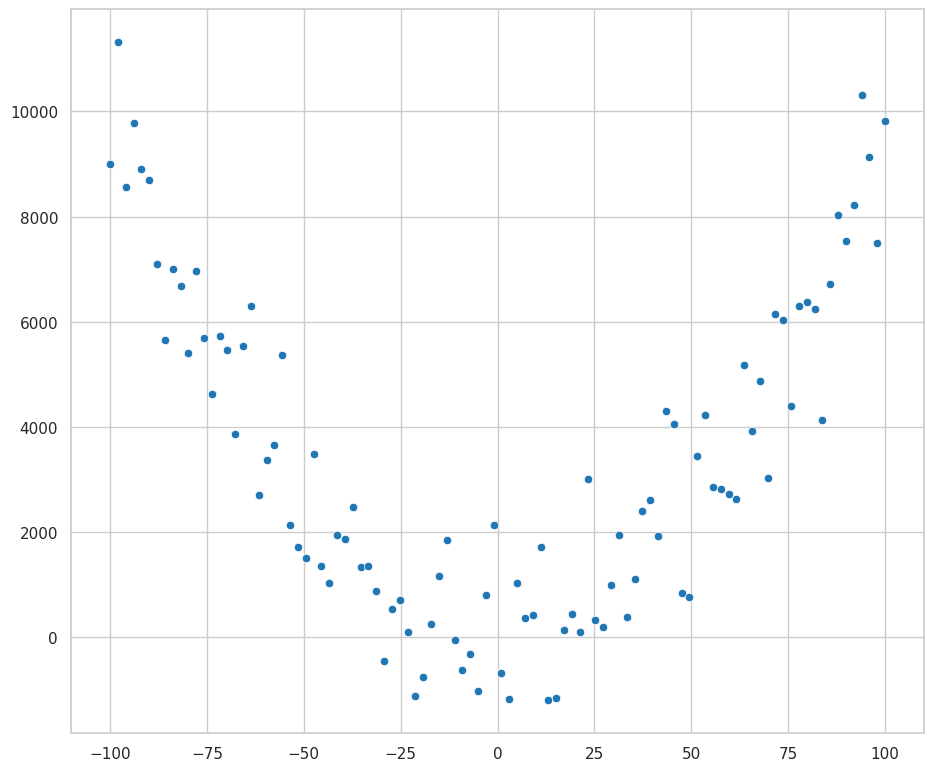

In [76]:
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

array([[1.        , 0.91647163],
       [0.91647163, 1.        ]])

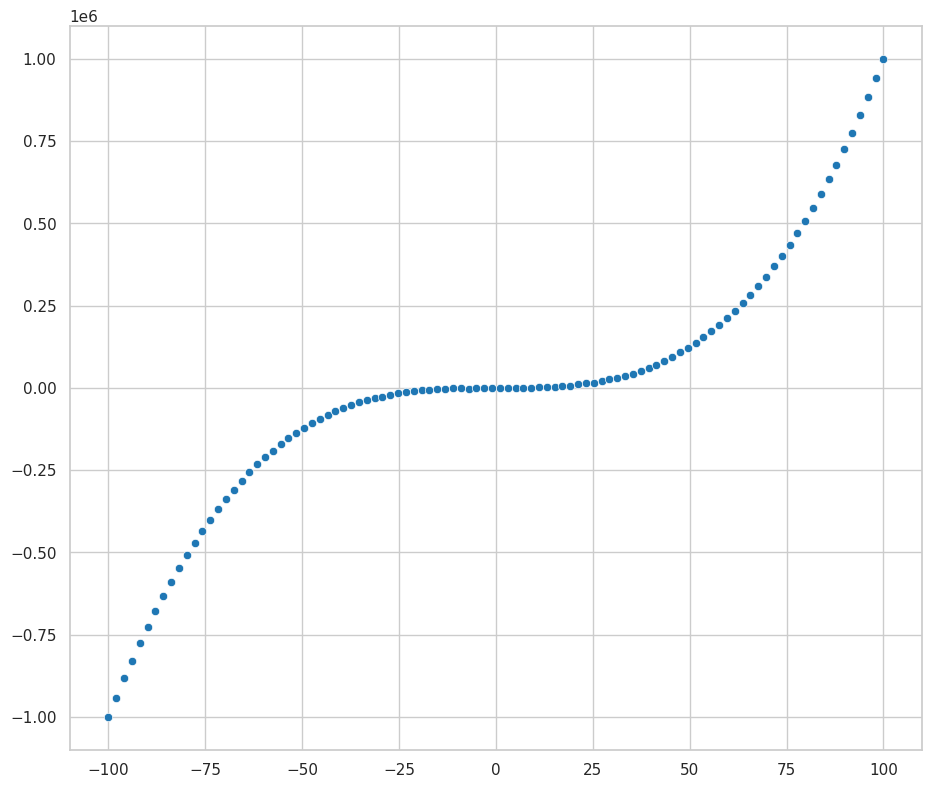

In [77]:
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

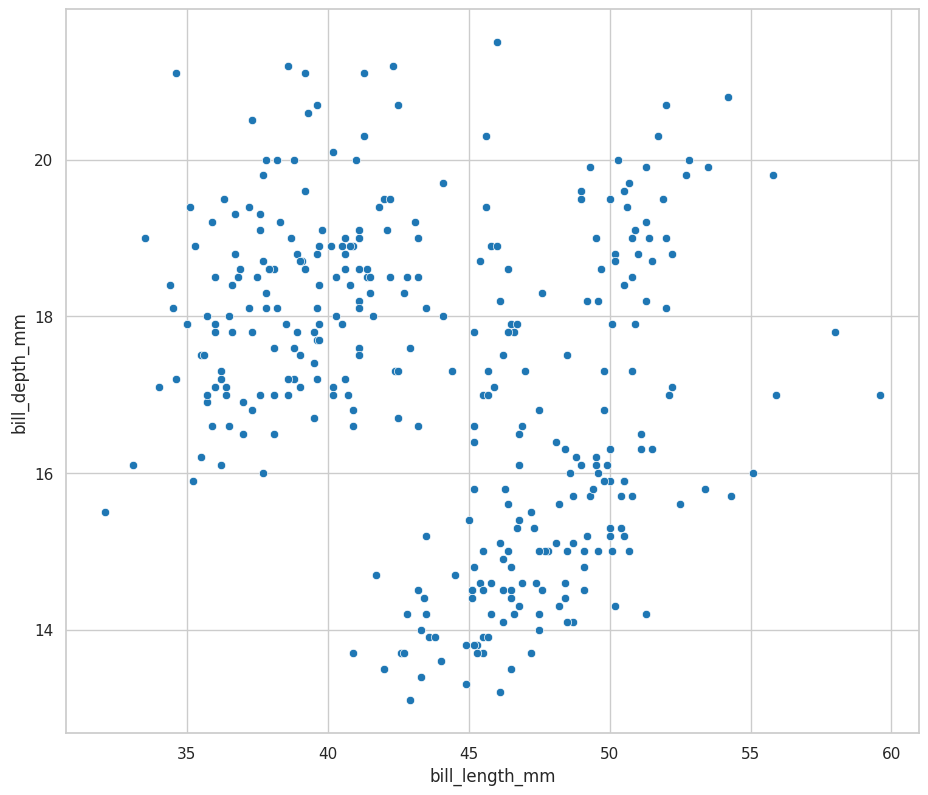

In [78]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


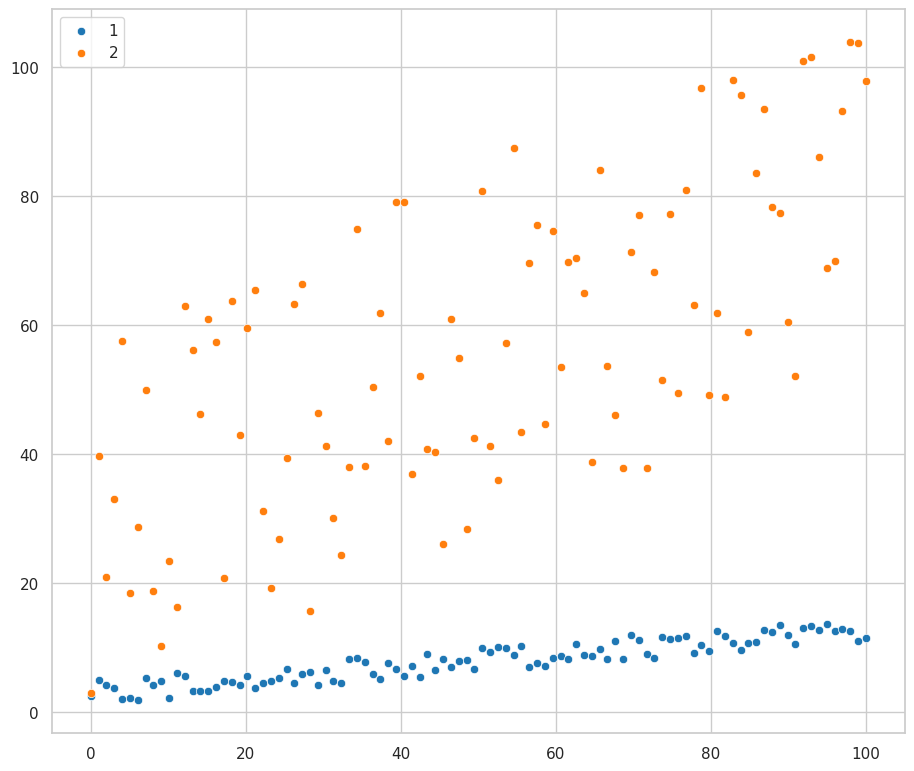

In [79]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Estableciendo relaciones: Análisis de regresión simple

In [80]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


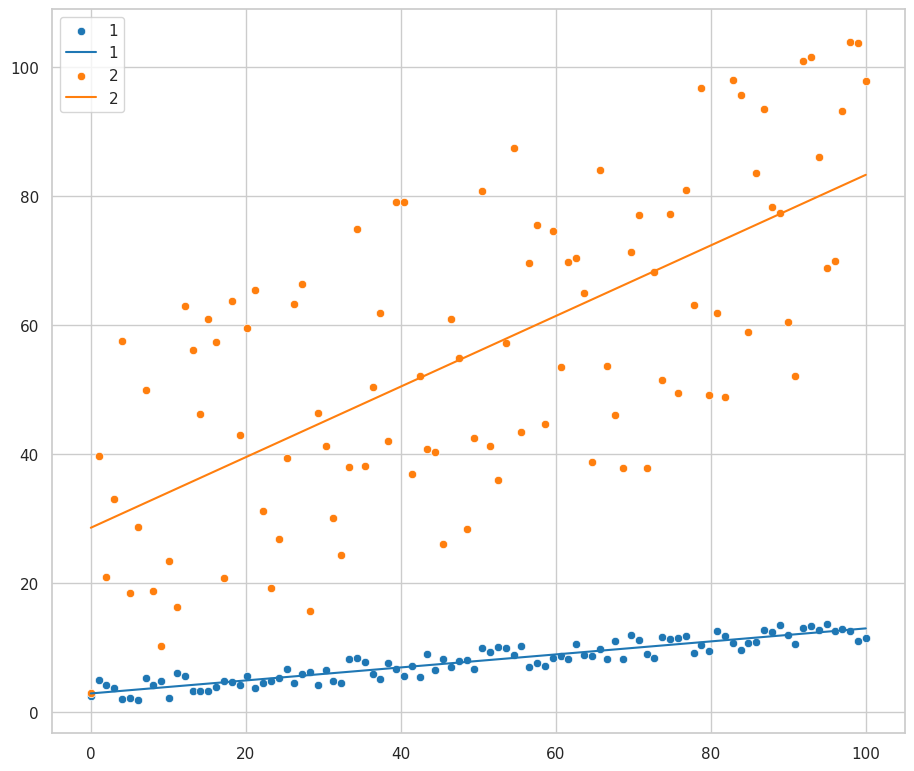

In [81]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


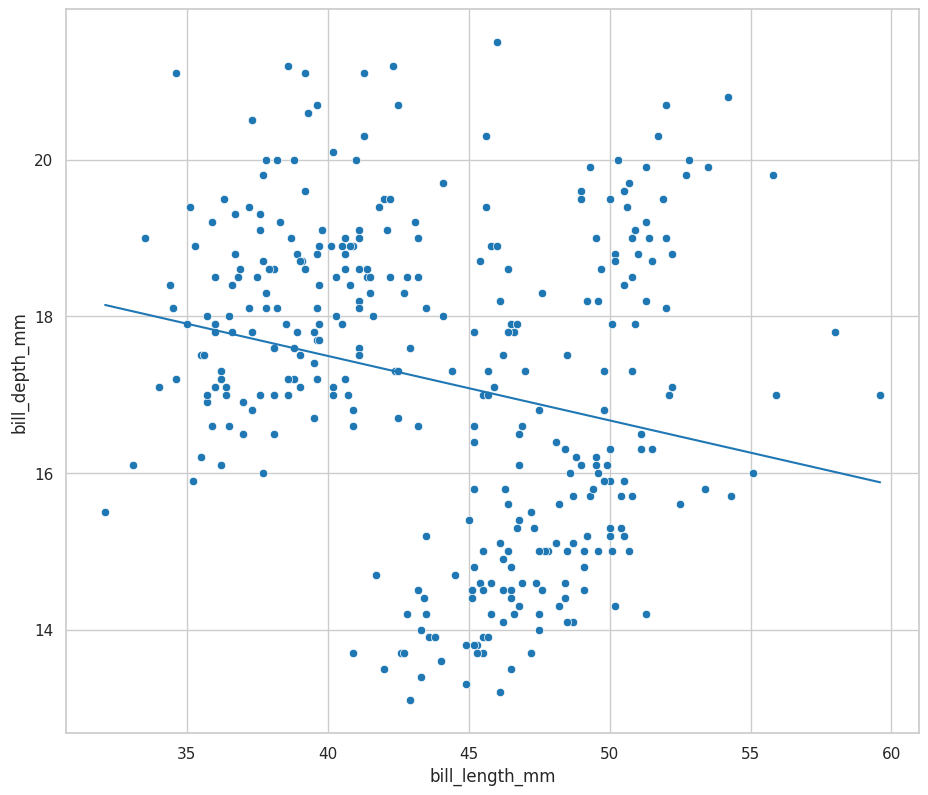

In [82]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)

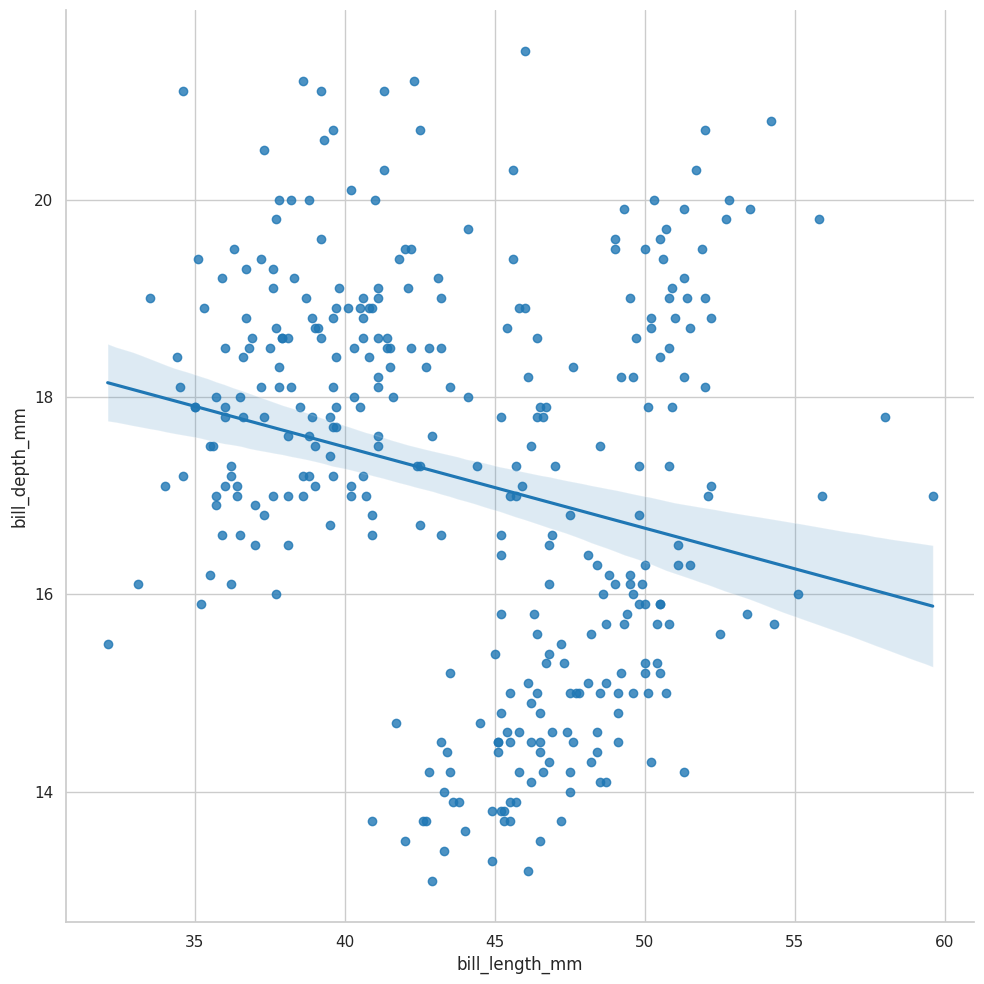

In [83]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

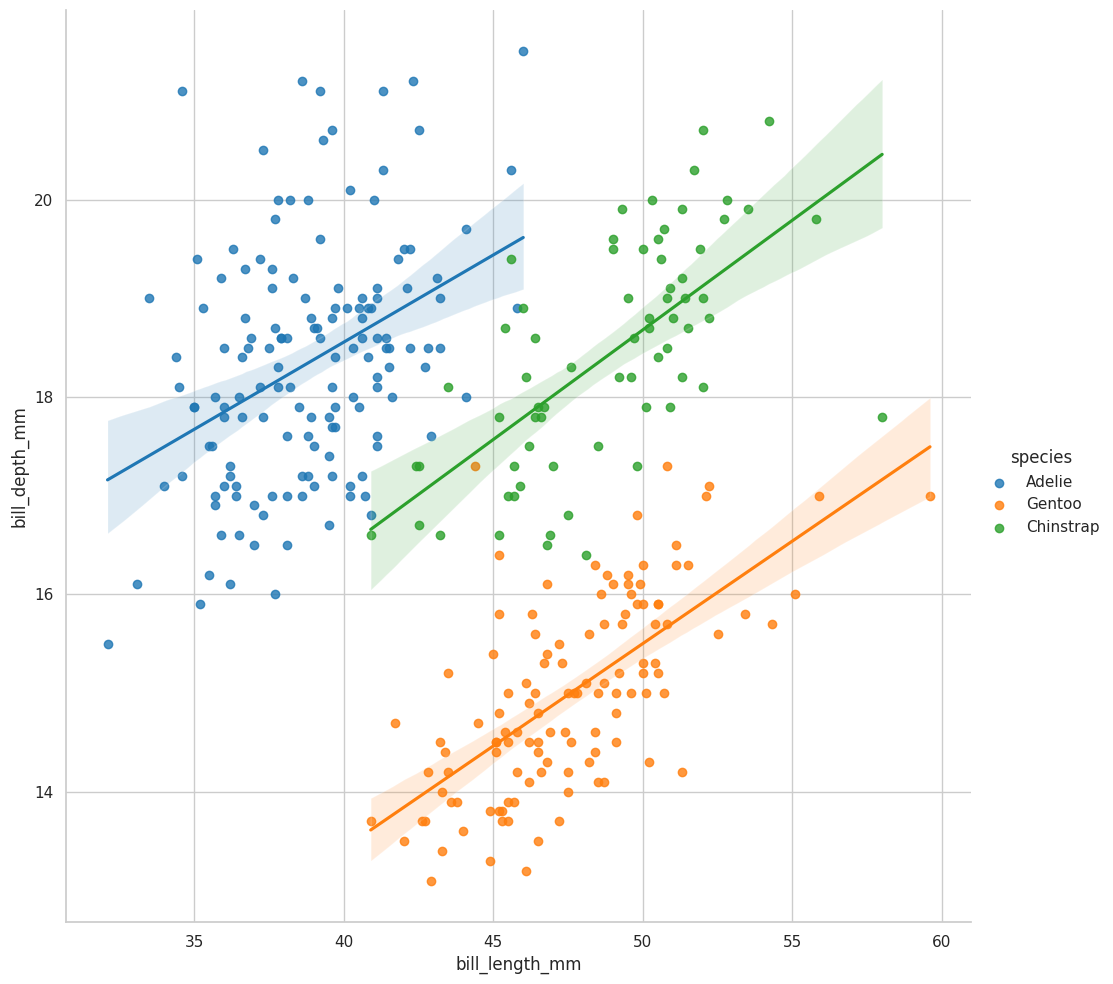

In [84]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

la correlación si se pudiera ver por especie, revelando que la tendencia es positiva en todas las especies de pingüino.

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [85]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(y=x, x=y)

print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


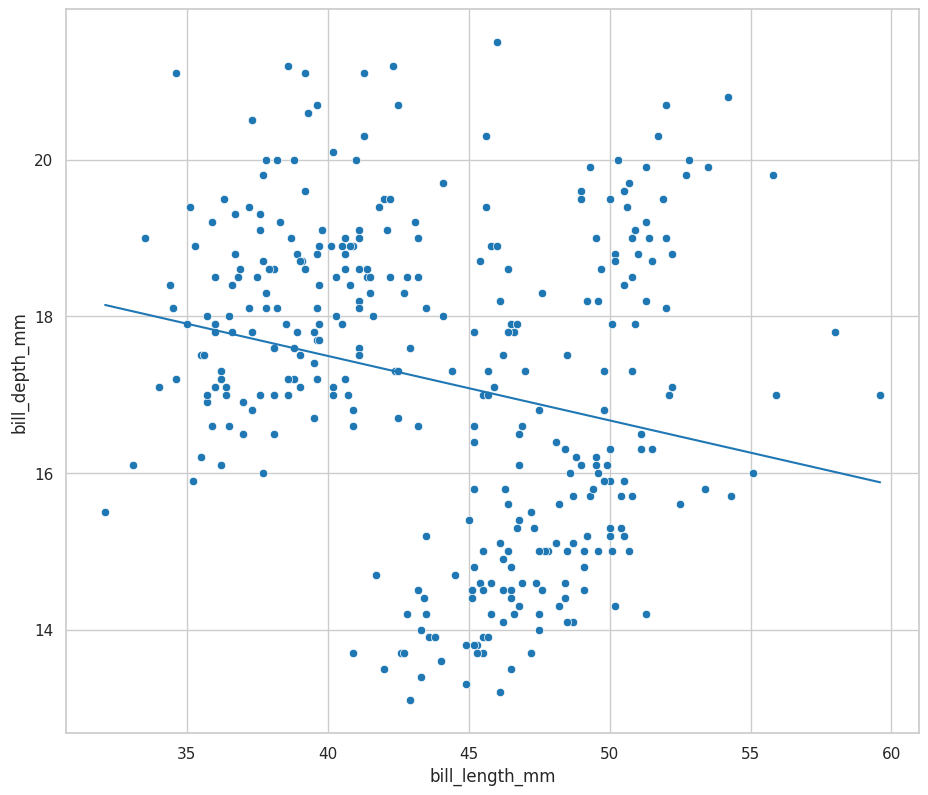

In [86]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

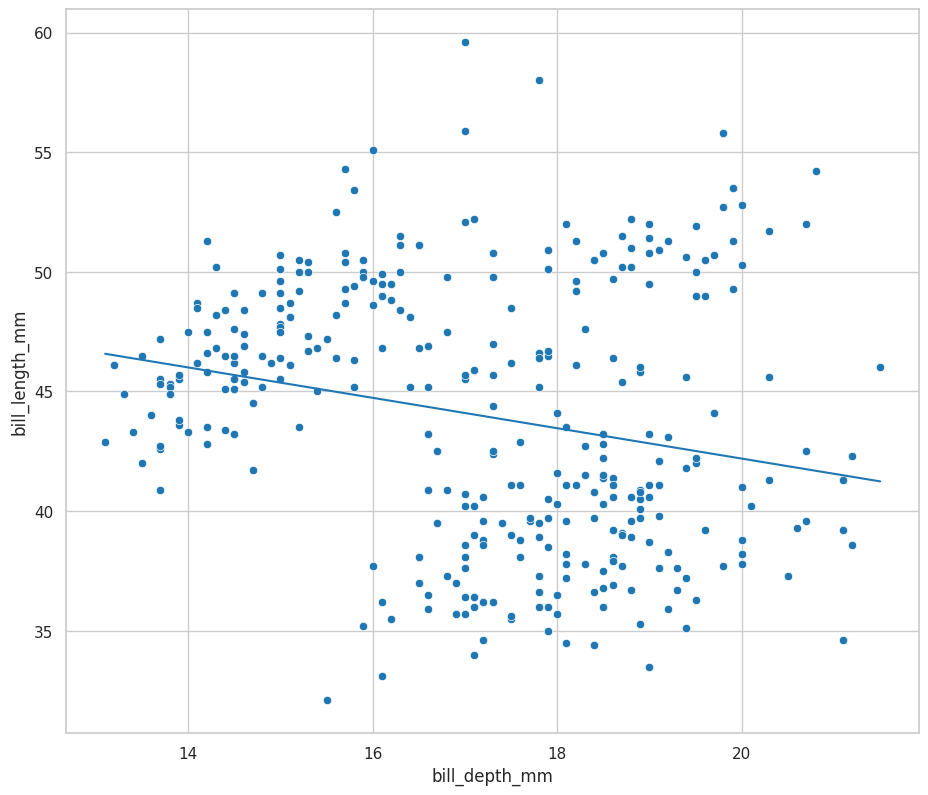

In [87]:
sns.scatterplot(
    x=y,
    y=x
)

fx_1 = np.array([y.min(), y.max()])
fy_1 =  res_y_x.intercept + res_y_x.slope *  fx_1

plt.plot(fx_1, fy_1)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

La pendiente es -0.634905, lo que significa que cada milímetro adicional de profundidad del pico es asociado a un decremento de -0.634905 milímetros de la longitud del pico de un pingüino.

In [88]:
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm",
         data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [89]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.53e-05
Time:                        17:03:32   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

### Creando modelos

In [90]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.54e-32
Time:                        17:03:33   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ",
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           7.04e-46
Time:                        17:03:33   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          9.26e-103
Time:                        17:03:33   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          6.28e-122
Time:                        17:03:33   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          3.53e-118
Time:                        17:03:33   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

In [95]:
models_results = pd.DataFrame(
    dict(
        actual_value=processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)

models_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5    species     sex  
0           3579.136946         3441.323750     Adelie    male  
1           3343.220772         3328.384372     Adelie  female  
2           3639.137335         3751.223949     Adelie  female  
4           3457.954243         3657.259599     Adelie  female  
5           3764.536023         3864.163327     Adelie    male  
..                  ...                 ...        ...     ...  
339         4455.022405         4662.860306  Chinstrap    male  
340         3894.857519         4080.099176  Chinstrap  female  
341         4063.639819         4005.109853  Chinstrap    male  
342         4652.013882         4803.806832  Chinstrap    male  
343         3672.299099         3892.170475  Chinstrap  female  

[333 rows x 8 columns]

<Axes: ylabel='Proportion'>

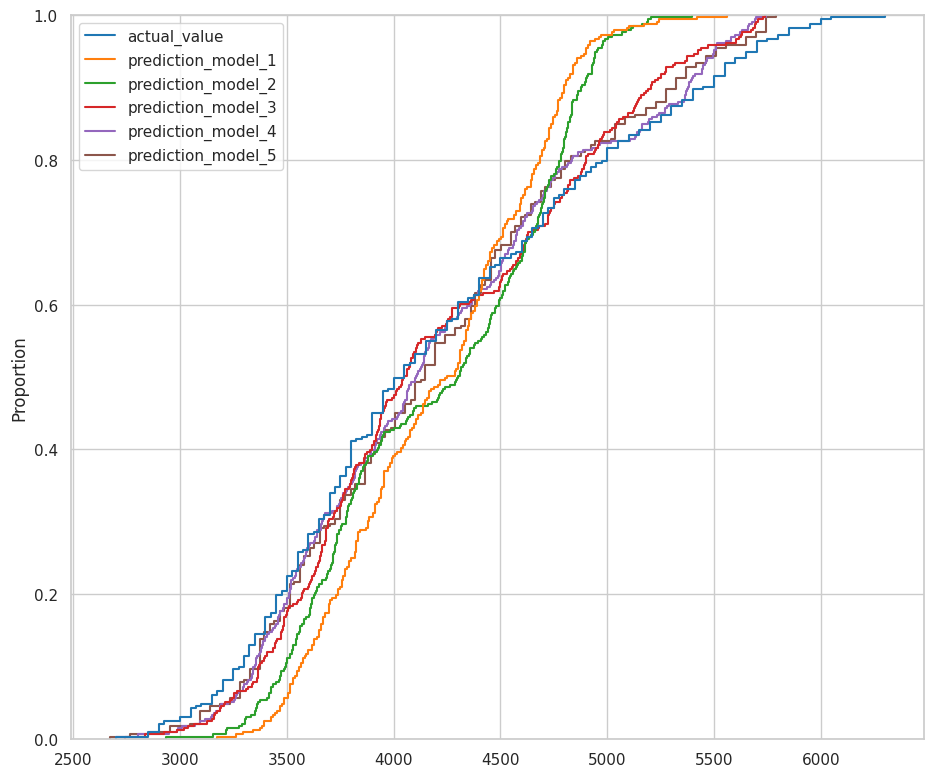

In [96]:
sns.ecdfplot(
    data=models_results#.select_columns(['actual_value', 'prediction_model_5'])
)

In [97]:
'''sns.kdeplot(
    data=models_results
    .select_columns(['actual_value', 'prediction_model_2']),
    cumulative=True #False
)'''

"sns.kdeplot(\n    data=models_results\n    .select_columns(['actual_value', 'prediction_model_2']),\n    cumulative=True #False\n)"

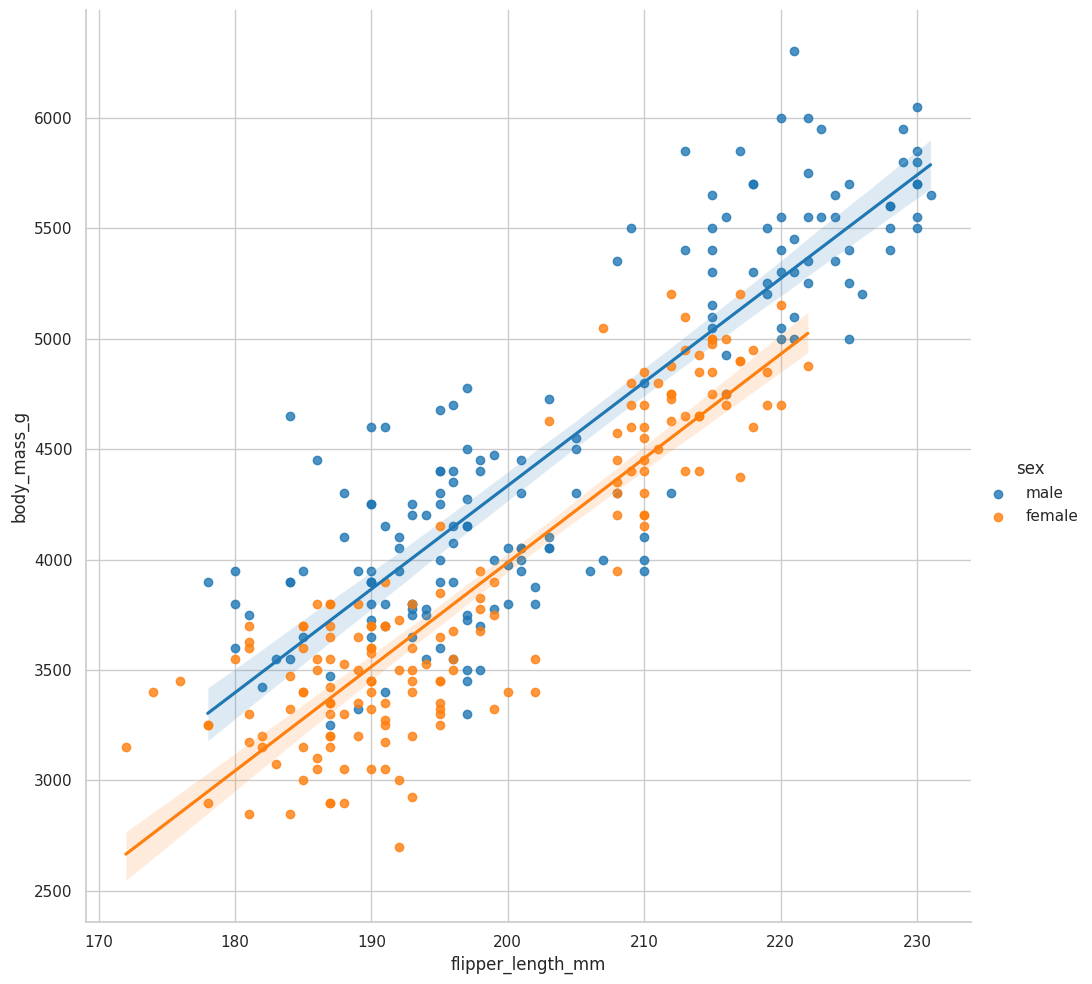

In [98]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

# Análisis de regresión logística

In [99]:
(
    processed_penguins_df
    .value_counts(['island', 'sex', 'species'])
    .reset_index(name='count')
)

island     sex    species  count
0     Biscoe    male     Gentoo     61
1     Biscoe  female     Gentoo     58
2      Dream  female  Chinstrap     34
3      Dream    male  Chinstrap     34
4      Dream    male     Adelie     28
5      Dream  female     Adelie     27
6  Torgersen  female     Adelie     24
7  Torgersen    male     Adelie     23
8     Biscoe  female     Adelie     22
9     Biscoe    male     Adelie     22

In [100]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [101]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))
)


/tmp/ipykernel_71869/1214011283.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))


In [102]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit(maxiter=100)

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [103]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

/tmp/ipykernel_71869/4030501972.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),


actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
339              0               0.0
340              0               0.0
341              0               1.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

In [104]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

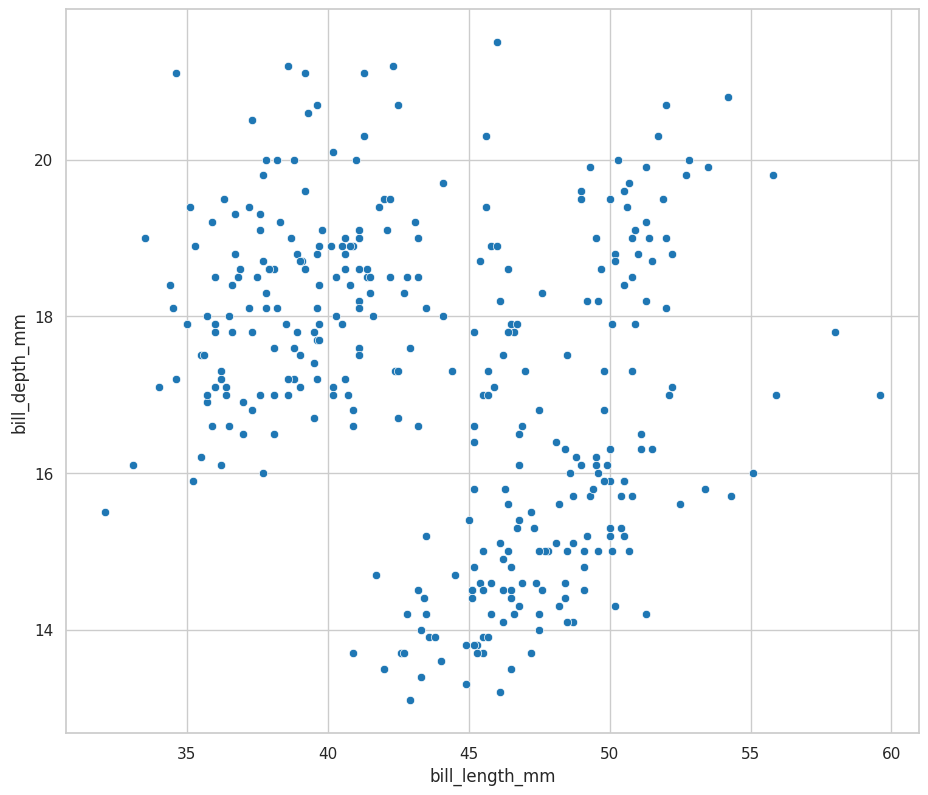

In [105]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

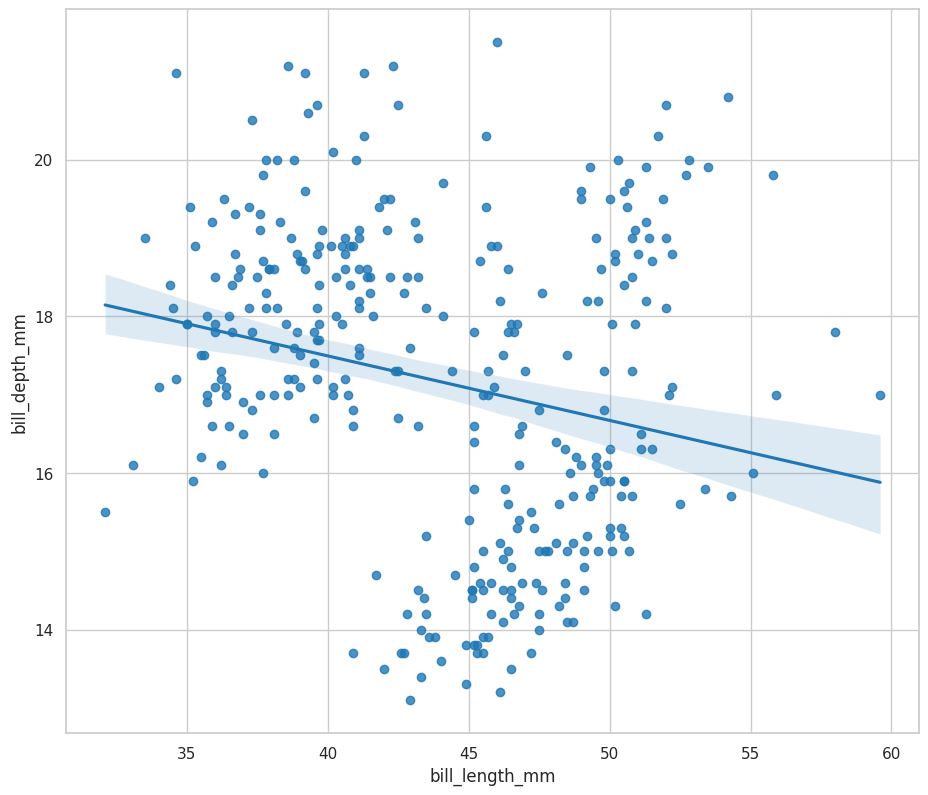

In [106]:
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

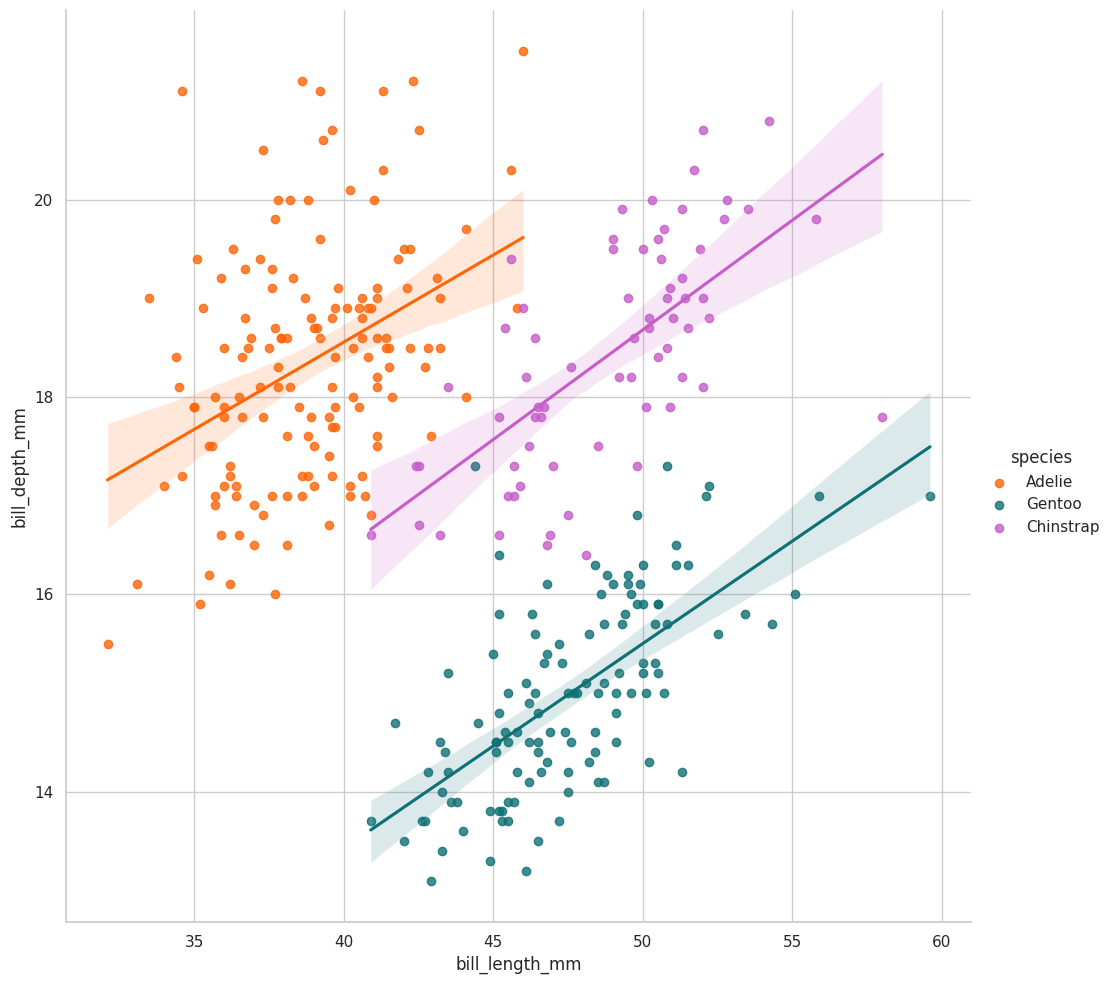

In [107]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

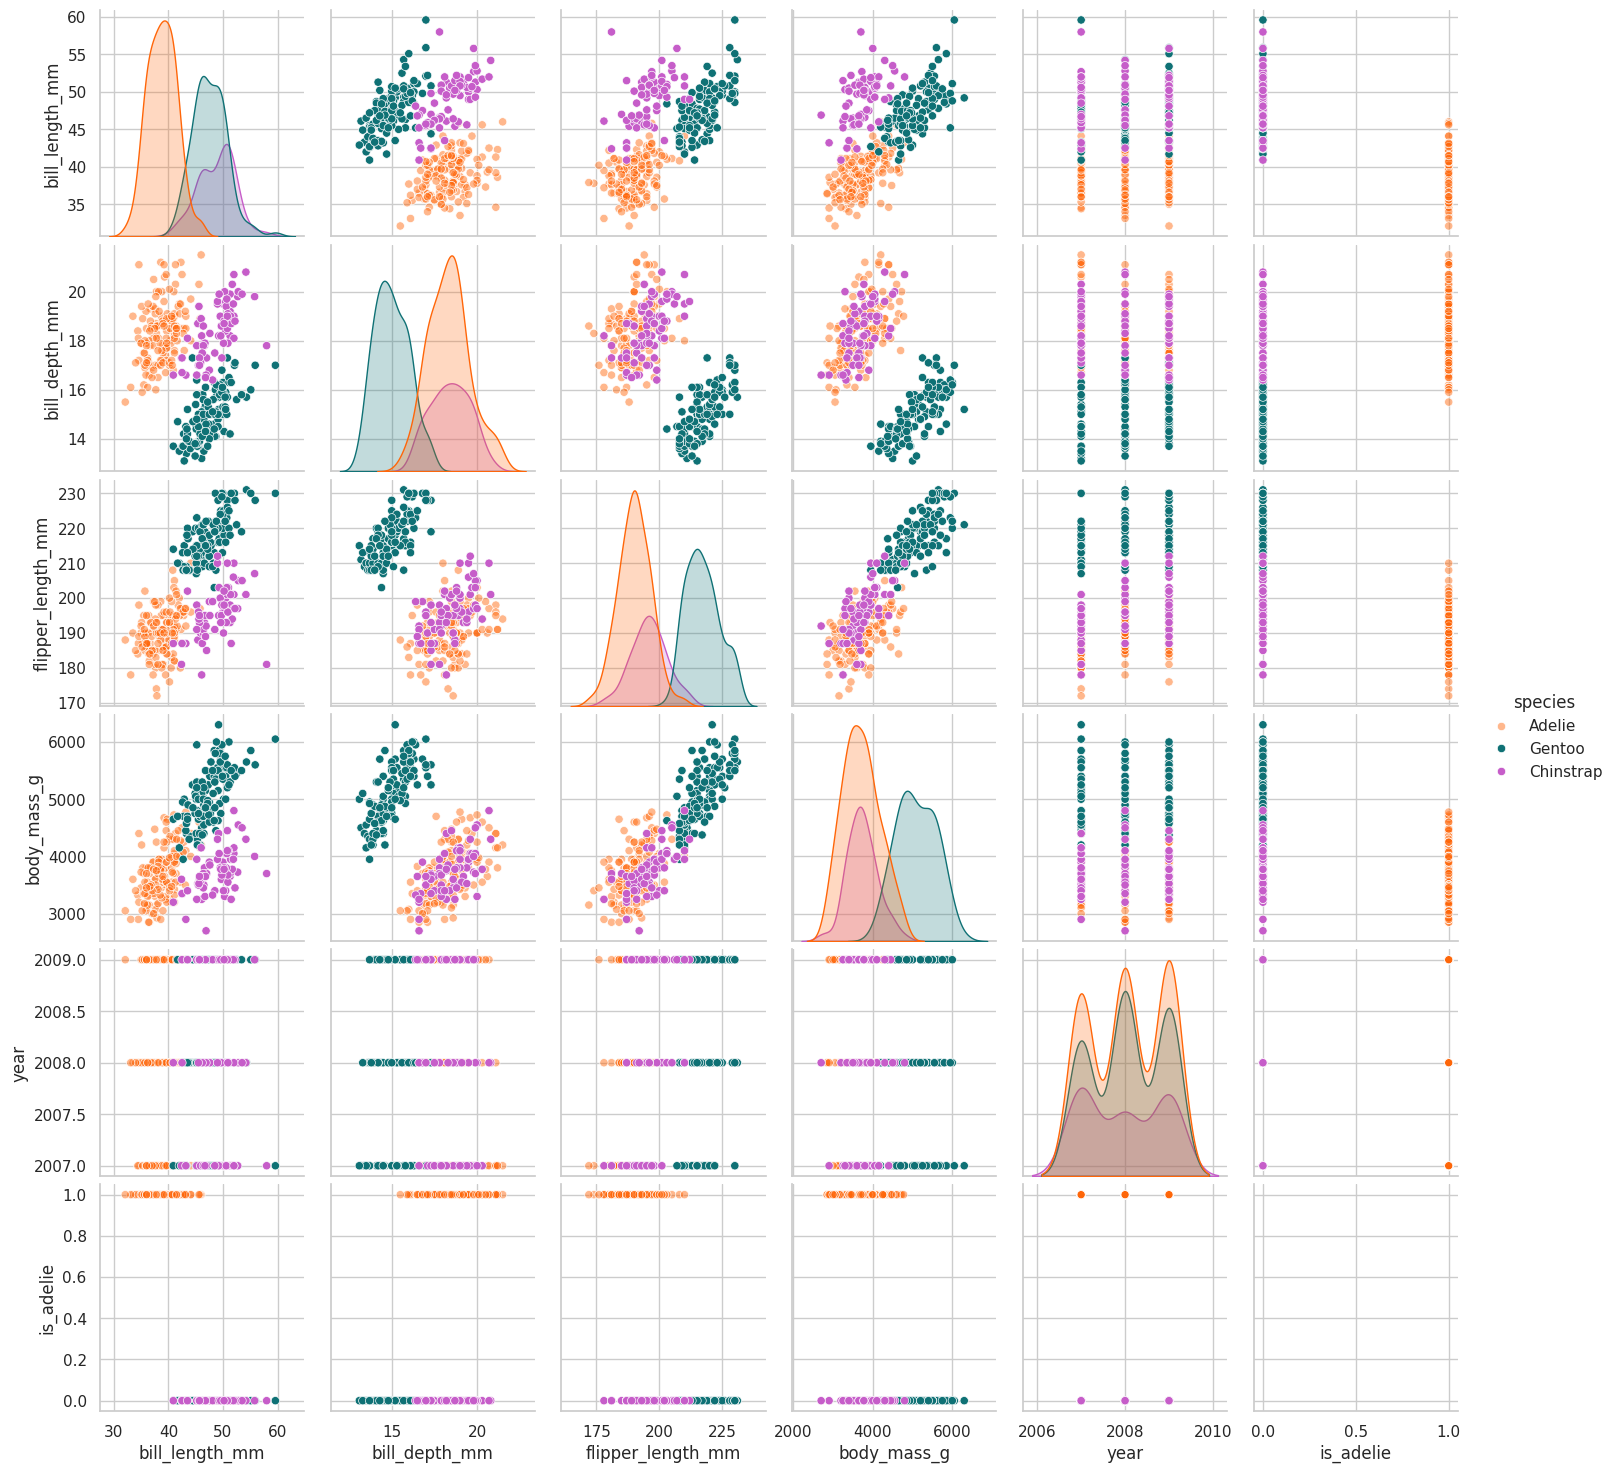

In [108]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)

## Información de sesión

In [109]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27d4abdc-2e26-41bc-9b7c-5e7131a13fd7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>